# 1. Intro

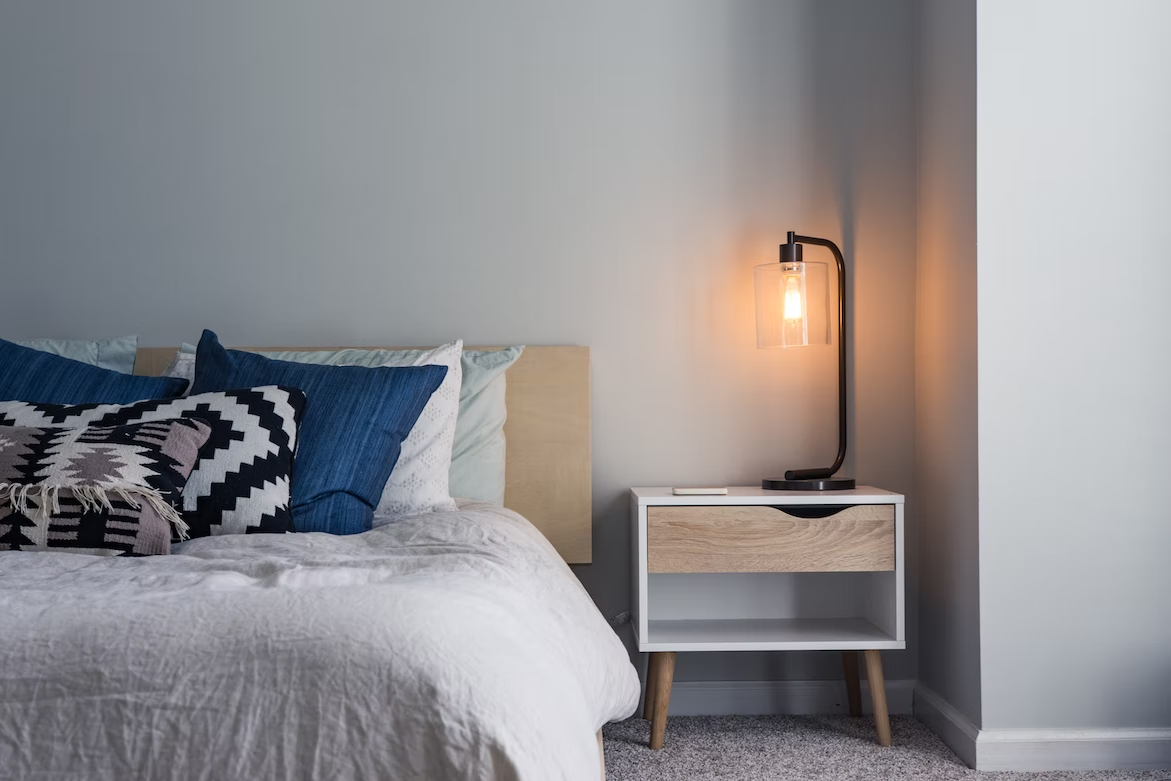

ÏïàÎÖïÌïòÏÑ∏Ïöî ! Stage 5Ïóê Ïò§Ïã† Îç∞Ïù¥Ïª§ Ïó¨Îü¨Î∂ÑÎì§ÏùÑ ÌôòÏòÅÌï©ÎãàÎã§ üëãüëãüëã



Stage 4ÏóêÏÑúÎäî ÏùòÏÇ¨Í≤∞Ï†ï ÎÇòÎ¨¥, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Í≥º Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä Î∞©Î≤ïÏùÑ Î∞∞Ïõ†ÏäµÎãàÎã§.

ÌòπÏãú Î≥µÏäµÌïòÏã† Î∂Ñ ÏûàÏúºÏã†Í∞ÄÏöî? ÏµúÍ≥† üëçüëç



Stage 5ÏóêÏÑúÎäî ÏÑ±Îä•Ïù¥ Ï¢ãÎã§Í≥† ÏïåÎ†§ÏßÑ Î∂ÄÏä§ÌåÖ Î™®Îç∏Í≥º PycaretÏóê ÎåÄÌï¥ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§. 



Ïù¥Ï†ú ÏñºÎßà Ïïà ÎÇ®ÏïòÎÑ§Ïöî üòÑ Stage 5ÎèÑ Î™®Îëê ÌôîÏù¥ÌåÖ Ìï¥Î¥êÏöî! üî•üî•üî•

---

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Îäî ÌïÑÏàòÎûçÎãàÎã§ !

Î≤åÏç® Îëê Î≤àÏù¥ÎÇò Ìï¥Î¥§ÏúºÎãà, ÏâΩÍ≤å ÌïòÏã§ Ïàò ÏûàÍ≤†Ï£†? Ïûê~ Îì§Ïñ¥Í∞ëÎãàÎã§! üöó

In [ ]:
# Ï£ºÌîºÌÑ∞ÎùºÏù¥Ìä∏ÏóêÏÑú seaborn ÏÇ¨Ïö©ÌïòÍ∏∞
import micropip
await micropip.install('seaborn')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§
train = pd.read_csv('./train.csv')

In [2]:
# ÌèâÎãπ ÏïÑÌååÌä∏ Ïã§Í±∞ÎûòÍ∞Ä ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
train['price_per_area'] = train['transaction_real_price'] / train['exclusive_use_area']*3.3

# ÏïÑÌååÌä∏ Ïó∞Ïãù Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
train['year'] = train['transaction_year_month'].astype(str).str[:4].astype(int)
train['month'] = train['transaction_year_month'].astype(str).str[4:].astype(int)

# Í±∞ÎûòÏùº
train.loc[(train['transaction_date'] == '21~30') | (train['transaction_date'] == '21~28') | (train['transaction_date'] == '21~29'), 'transaction_date'] = '21~31'

# ÏïÑÌååÌä∏ Ïó∞Ïãù
train['age'] = train['year'] - train['year_of_completion']

# Ïû¨Í±¥Ï∂ïÏó¨Î∂Ä
train.loc[train['age'] < 20, 'reconstruction'] = 'NO'
train.loc[train['age'] >= 20, 'reconstruction'] = 'YES'

In [3]:
# re Î™®ÎìàÏùÑ ÏÑ†Ïñ∏ÌïòÍ≥† Í¥ÑÌò∏ÏôÄ Í¥ÑÌò∏ Ïïà Î¨∏ÏûêÎ•º Ï∞æÏïÑÏÑú ÏÇ≠Ï†úÌï©ÎãàÎã§.
from tqdm import tqdm
import time
import re

regex = "\(.*\)"

for i in tqdm(range(len(train))):
   train.at[i, 'apt'] = re.sub(regex, '', train.at[i, 'apt']) 

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1216553/1216553 [00:31<00:00, 38455.26it/s]


In [4]:
# ÏÉÅÏúÑ 20Í∞ú ÏïÑÌååÌä∏ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
apt_brand_list = train['apt'].value_counts()[:20].index

# ÏÉÅÏúÑ 20Í∞ú ÏïÑÌååÌä∏ Ïù¥Î¶ÑÏóê ÏÜçÌïòÎäîÏßÄÎ•º Íµ¨Î≥ÑÌïòÎäî Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
train['branded'] = False

# ÏïÑÌååÌä∏ Ïù¥Î¶ÑÏù¥ Î¶¨Ïä§Ìä∏ ÏïàÏùò Î∏åÎûúÎìúÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎã§Î©¥ ÎåÄÌëú Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍøîÍ≥† branded Î≥ÄÏàòÎ•º TrueÎ°ú Î∞îÍøâÎãàÎã§.
for brand in tqdm(apt_brand_list):
  train['apt'].loc[train['apt'].str.contains(brand)] = brand
  train['branded'].loc[train['apt'].str.contains(brand)] = True

# branded Î≥ÄÏàòÍ∞Ä FalseÏù∏ ÏïÑÌååÌä∏Î•º othersÎùºÎäî Ïù¥Î¶ÑÏúºÎ°ú ÌÜµÌï©Ìï©ÎãàÎã§.
train['apt'].loc[~train['branded']] = 'others'

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_5040\2881525954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['apt'].loc[train['apt'].str.contains(brand)] = brand
C:\Users\USER\AppData\Local\Temp\ipykernel_5040\2881525954.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['branded'].loc[train['apt'].str.contains(brand)] = True
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

In [5]:
# ÌèâÎã®Í∞Ä ÌèâÍ∑†ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏïÑÌååÌä∏Î™ÖÏùÑ Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨Ìï¥Ï§çÎãàÎã§. 
apt_price = train.groupby('apt')['price_per_area'].mean().sort_values(ascending=True)

# ÌèâÎã®Í∞Ä ÌèâÍ∑†Ïù¥ ÎÇÆÏùÄ ÏàúÏúºÎ°ú ÏïÑÌååÌä∏Î™ÖÏóê 0Î∂ÄÌÑ∞ 19ÍπåÏßÄ Î∂ÄÏó¨Ìï¥Ï§çÎãàÎã§.
for i, apt in enumerate(tqdm(apt_price.index)):
    train['apt'].loc[train['apt'] == apt] = i

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_5040\689223827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['apt'].loc[train['apt'] == apt] = i
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:02<00:00,  7.67it/s]


In [6]:
# object ÌÉÄÏûÖÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù¥Î•º int64 ÌòïÌÉúÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
train.loc[:,'apt'] = train.loc[:,'apt'].astype('int')

In [7]:
# Î°úÍ∑∏Î≥ÄÌôò
train['transaction_real_price'] = np.log1p(train['transaction_real_price'])

# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
train  = train.loc[train['price_per_area']>= 200, :]

In [8]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏôÄ ÏàòÏπòÌòï Î≥ÄÏàòÎ°ú Î∂ÑÎ¶¨
train_X_cat = train[['city','transaction_date', 'reconstruction']]
train_X_num = train[['exclusive_use_area','floor', 'age']]

In [9]:
# ÎùºÎ≤®Ïù∏ÏΩîÎî©
le = LabelEncoder()
train_X_cat.loc[:,'city'] = le.fit_transform(train_X_cat.loc[:,'city'])
train_X_cat.loc[:,'transaction_date'] = le.fit_transform(train_X_cat.loc[:,'transaction_date'])
train_X_cat.loc[:,'reconstruction'] = le.fit_transform(train_X_cat.loc[:,'reconstruction'])

C:\Users\USER\AppData\Local\Temp\ipykernel_5040\1386556571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X_cat.loc[:,'city'] = le.fit_transform(train_X_cat.loc[:,'city'])
C:\Users\USER\AppData\Local\Temp\ipykernel_5040\1386556571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X_cat.loc[:,'transaction_date'] = le.fit_transform(train_X_cat.loc[:,'transaction_date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_5040\1386556571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

In [10]:
# Ï†ïÍ∑úÌôî 
minmax_scaler = MinMaxScaler()
train_minmax = minmax_scaler.fit_transform(train_X_num)
train_minmax = pd.DataFrame(train_minmax, index=train_X_num.index, columns=train_X_num.columns)

In [11]:
# ÎùºÎ≤®Ïù∏ÏΩîÎî©Í≥º Ï†ïÍ∑úÌôîÍ∞Ä ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
X = pd.concat([train_minmax, train_X_cat, train['apt']], axis=1)

In [12]:
# ÏòàÏ∏°Ìï¥Ïïº Ìï† Î≥ÄÏàòÎ•º yÎùºÎäî Í∞ùÏ≤¥Ïóê Îî∞Î°ú Ï†ÄÏû•Ìï©ÎãàÎã§.
y = train['transaction_real_price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÍ∞Ä ÏôÑÎ£åÎêòÏóàÏñ¥Ïöî üòôüòô

Ïù¥Ï†ú Ïã§ÏäµÏùÑ ÏãúÏûëÌï¥Î≥ºÍπåÏöî? üíñ

---

# 3. Î∂ÄÏä§ÌåÖ(Boosting)

Stage4ÏóêÏÑú Î∞∞ÍπÖ(Bagging)Í∏∞Î∞òÏùò ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏù¥ Î¨¥ÏóáÏù∏ÏßÄ Î∞∞Ïõ†Í≥†, <br>
Í∑∏Î≥¥Îã§ Îçî Î∞úÏ†ÑÎêú Î∞©Î≤ïÏù∏ <font color=purple>**ÎûúÎç§Ìè¨Î†àÏä§Ìä∏(RandomForest)**</font>Ïóê ÎåÄÌï¥ Î∞∞Ïõ†ÎäîÎç∞Ïöî. (Îã§ Í∞ôÏù¥ Î≥µÏäµ Î≥µÏäµ! ‚úèÔ∏è‚úèÔ∏è

stage5 ÏóêÏÑúÎäî Î∞∞ÍπÖÍ≥ºÎäî Îòê Îã§Î•∏ ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏù∏ Î∂ÄÏä§ÌåÖ(Boosting) Í∏∞Î∞òÏùò Î™®Îç∏Îì§ÏùÑ Î∞∞ÏõåÎ≥¥Í≤†ÏäµÎãàÎã§.

<font color=red>**Î∂ÄÏä§ÌåÖ(Boosting)**</font>Ïù¥ÎûÄ ÏïΩÌïú ÌïôÏäµÍ∏∞(weak learner)Í∞Ä ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÌïôÏäµÏùÑ ÏàòÌñâÌïòÎêò, <br>
ÏûòÎ™ª ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÎÜíÏùÄ <font color=green>**Í∞ÄÏ§ëÏπò**</font>Î•º ÎëêÏñ¥ Îã§Ïùå ÌïôÏäµÍ∏∞ÏóêÏÑú Ïò§Î•òÎ•º Í∞úÏÑ†Ìï¥ ÎÇòÍ∞ÄÎäî ÌïôÏäµ Î∞©Î≤ïÏûÖÎãàÎã§.


Ïó¨Í∏∞ÏÑú <font color=blue>ÏïΩÌïú ÌïôÏäµÍ∏∞(weak learner)</font>ÎûÄ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌïòÎäî Í≤É Î≥¥Îã§ ÏïΩÍ∞Ñ ÏÑ±Îä•Ïù¥ Îçî Ï¢ãÏùÄ Î™®Îç∏ÏùÑ ÏùòÎØ∏ÌïòÎ©∞, <br>
Ï£ºÎ°ú ÍπäÏù¥Í∞Ä ÎÇÆÏùÄ ÏùòÏÇ¨Í≤∞Ï†ï ÎÇòÎ¨¥(Decision Tree)Î•º ÏïΩÌïú ÌïôÏäµÍ∏∞Î°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.

## 3.1 AdaBoost

Ïù¥Îü¨Ìïú Î∂ÄÏä§ÌåÖ Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÎäî ÎåÄÌëúÏ†ÅÏù∏ Î™®Îç∏ÏóêÎäî AdaboostÍ∞Ä ÏûàÏäµÎãàÎã§. 

<font color=red>**AdaBoost**</font>Îäî Ïù¥Ï†Ñ Î™®ÌòïÏóêÏÑú <font color=blue>Ïò§Ï∞®Í∞Ä ÌÅ∞ Îç∞Ïù¥ÌÑ∞(ÌòπÏùÄ Ïò§Î∂ÑÎ•òÎêú Îç∞Ïù¥ÌÑ∞)</font>Ïóê Îçî ÏßëÏ§ëÌïòÏó¨ ÏïΩÏ†êÏùÑ Î≥¥ÏôÑÌïòÎäî ÎåÄÌëúÏ†ÅÏù∏ Î∂ÄÏä§ÌåÖ Í∏∞Î≤ïÏùò Î™®Îç∏Ïù¥ÏóêÏöî.

AdaBoostÏùò ÏõêÎ¶¨Î•º Ïù¥Ìï¥ÌïòÎäî Îç∞ÏóêÎäî Î∂ÑÎ•ò Î™®ÌòïÏù¥ Îçî ÏßÅÍ¥ÄÏ†ÅÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, Î∂ÑÎ•ò Î™®ÌòïÏùÑ ÌÜµÌï¥ AdaBoostÏùò ÏõêÎ¶¨Î•º ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§.

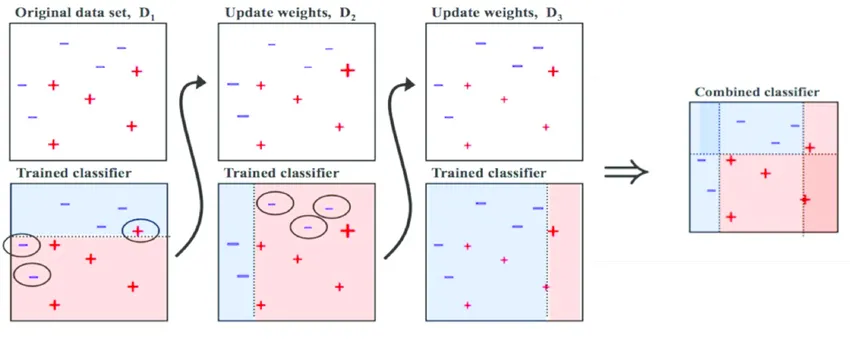

>Ï∂úÏ≤ò: https://towardsdatascience.com/understanding-adaboost-for-decision-tree-ff8f07d2851

Ïó¨Í∏∞ÏÑú Î≥¥Ïù¥Îäî Î™®Îç∏Îì§ÏùÄ <font color=purple>ÎÖ∏ÎìúÎ•º ÌïòÎÇòÎßå Í∞ÄÏßÑ ÏùòÏÇ¨Í≤∞Ï†ï ÎÇòÎ¨¥</font>ÏûÖÎãàÎã§. 

Ï¶â, ÏïΩÌïú ÌïôÏäµÍ∏∞(weak learner)Î°ú ÎÖ∏ÎìúÎ•º ÌïòÎÇòÎßå Í∞ÄÏßÄÎäî ÏùòÏÇ¨Í≤∞Ï†ï ÎÇòÎ¨¥Î•º ÏÑ†ÌÉùÌñàÏäµÎãàÎã§. 

weak learner **3Í∞ú**Î•º ÏÇ¨Ïö©ÌïòÏó¨ AdaboostÎ•º ÎßåÎì†Îã§Í≥† Í∞ÄÏ†ïÌïòÎ©¥ **ÏõêÎ¶¨**Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

‚ë† Model 1ÏóêÏÑú <font color=green>‚≠ïÎèôÍ∑∏ÎùºÎØ∏Ïπú Îç∞Ïù¥ÌÑ∞‚≠ï</font>Îäî <font color=blue>weak learner1Ïù¥ ‚ùåÏûòÎ™ª ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞Îì§‚ùå</font>ÏûÖÎãàÎã§.
* Model 2ÏóêÏÑú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îì§Ïùò ÌÅ¨Í∏∞Í∞Ä Ïª§ÏßÑ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§ üò≥
* Ïù¥Ï≤òÎüº weak learner 1Ïù¥ ÏûòÎ™ª ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞Î•º **Îã§Ïùå Î™®Îç∏Ïù∏ weak learner 2Í∞Ä Ïûò ÏòàÏ∏°ÌïòÎèÑÎ°ù Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨**Ìï©ÎãàÎã§.
* Ïù¥Î•º ÌÜµÌï¥ weak learner 2Îäî **ÏûòÎ™ª ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ•òÌïòÎäîÎç∞ Îçî ÏßëÏ§ë**ÌïòÍ≤å Îê©ÎãàÎã§.

‚ë° Îã§ÏùåÏúºÎ°ú weak learner 3Îäî <font color=blue>weak learner 1, 2Í∞Ä ‚ùåÏûòÎ™ª ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞‚ùåÎ•º Îçî Ïûò ÏòàÏ∏°ÌïòÎèÑÎ°ù Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨</font>Ìï©ÎãàÎã§.
* Ïù¥Î•º ÌÜµÌï¥, weak learner 3Îäî weak learner 1, 2Í∞Ä **ÏûòÎ™ª ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ•òÌïòÎäîÎç∞ Îçî ÏßëÏ§ë**ÌïòÍ≤å Îê©ÎãàÎã§. 

‚ë¢ Ïù¥Î•º Î∞îÌÉïÏúºÎ°ú 3Í∞ú Î™®Îç∏Ïùò <font color=green>**Í∞ÄÏ§ëÏπò**</font>Î•º Í≥ÑÏÇ∞ÌïòÍ≥† Ïù¥Î•º Î∞òÏòÅÌïòÏó¨ ÏµúÏ¢Ö Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.

Î∞∞ÍπÖÍ≥ºÏùò Ï∞®Ïù¥Ï†êÏù¥ Î≥¥Ïù¥ÏãúÎÇòÏöî?


Î∂ÄÏä§ÌåÖ Í∏∞Î≤ïÏùÄ Î∞∞ÍπÖÍ≥º Îã¨Î¶¨ Í∞ÅÍ∞ÅÏùò Î™®Îç∏ÏùÑ <font color=purple>**ÏàúÏ∞®Ï†Å**</font>ÏúºÎ°ú Ï†ÅÏö©ÌïòÎäîÍ≤å Í∞ÄÏû• ÌÅ∞ ÌäπÏßïÏûÖÎãàÎã§.




---

### AdaBoostÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞

AdaboostÎèÑ Îã§Î•∏ Î™®Îç∏Îì§Ï≤òÎüº Ïó¨Îü¨ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÏûàÎäîÎç∞Ïöî. <br>
ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏïåÏïÑÎ≥ºÍ≤åÏöî üôÇ

- base_estimator : ÌïôÏäµÏãú ÏÇ¨Ïö©ÌïòÎäî ÏïΩÌïú ÌïôÏäµÍ∏∞Ïùò Ï¢ÖÎ•òÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§.

  ÏÑ§Ï†ïÌïòÏßÄ ÏïäÏúºÎ©¥ Í∏∞Î≥∏Í∞íÏùÄ ÍπäÏù¥Í∞Ä 1Ïù∏ ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥Í∞Ä ÏÇ¨Ïö©Îê©ÎãàÎã§.

- learning_rate : ÏïΩÌïú ÌïôÏäµÍ∏∞Í∞Ä ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ïò§Î•òÍ∞íÏùÑ Î≥¥Ï†ïÌï¥ÎÇòÍ∞à Îïå Ï†ÅÏö©ÌïòÎäî Í≥ÑÏàòÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§.

  <font color=green>ÏñºÎßàÎÇò Í∞ïÌïòÍ≤å Ïò§Î•òÎ•º Î≥¥Ï†ïÌï† Í≤ÉÏù∏ÏßÄ</font>Î•º Í≤∞Ï†ïÌïúÎã§Í≥† ÏÉùÍ∞ÅÌïòÎ©¥ ÎêòÍ≤†ÏäµÎãàÎã§.
  
  Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï≤úÏ≤úÌûà ÏßÑÌñâÌïòÎäî ÏÑ∏Î∞ÄÌïú Î™®Îç∏Ïù¥ ÎêòÏßÄÎßå ÏÜçÎèÑÍ∞Ä ÎäêÎ¶¨Îã§Îäî Îã®Ï†êÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.
  
  Î∞òÎ©¥Ïóê Í∞íÏù¥ ÌÅ¨Î©¥ ÏÜçÎèÑÎäî Îπ†Î•¥ÏßÄÎßå ÎîîÌÖåÏùºÌïú Î∂ÄÎ∂ÑÏùÑ ÎÜìÏπ† Ïàò ÏûàÏäµÎãàÎã§. Îî∞ÎùºÏÑú Ï†ÅÏ†àÌïú Í∞íÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.

- n_estimators : ÏïΩÌïú ÌïôÏäµÍ∏∞Ïùò Í∞úÏàòÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§.

  ÏïΩÌïú ÌïôÏäµÍ∏∞Îäî ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ïò§Î•òÎ•º Î≥¥Ï†ïÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í∑∏ ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏùºÏ†ï Íµ¨Í∞ÑÍπåÏßÄ Î™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ ÎÜíÏïÑÏßëÎãàÎã§.
  
  ÌïòÏßÄÎßå ÎßéÏù¥ ÏÇ¨Ïö©Ìï†ÏàòÎ°ù ÏÜçÎèÑÍ∞Ä ÎäêÎ†§ÏßÑÎã§Îäî Îã®Ï†êÏù¥ ÏûàÏäµÎãàÎã§.

Ïó¨Í∏∞ÏÑú Ìïú Í∞ÄÏßÄ ‚ö†Ô∏èÏ£ºÏùòÌï† Ï†ê‚ö†Ô∏èÏù¥ ÏûàÎäîÎç∞Ïöî

learning rateÏóê Îî∞Îùº ÏïΩÌïú ÌïôÏäµÍ∏∞Í∞Ä Ïò§Î•òÎ•º Î≥¥Ï†ïÌïòÍ∏∞ ÎïåÎ¨∏Ïóê learning rateÏôÄ n_estimatorsÎäî ÏÑúÎ°ú Ïó∞Í¥ÄÏÑ±Ïù¥ ÌÅΩÎãàÎã§.



Îî∞ÎùºÏÑú learning_rateÎ•º Î≥ÄÍ≤ΩÌïúÎã§Î©¥ Ïù¥Ïóê ÎåÄÏùëÎêòÎäî Ï†ÅÌï©Ìïú ÏïΩÌïú ÌïôÏäµÍ∏∞Ïùò Í∞úÏàòÎ•º ÏÑ†ÌÉùÌï¥ÏÑú ÌïôÏäµÏùÑ ÏàòÌñâÌï¥Ïïº ÌïúÎã§Îäî Ï†ê, ÏûäÏßÄ ÏïäÍ∏∞Î°ú Ìï¥Ïöî Ïö∞Î¶¨! üíï

Ïù¥Ï†ú Ïã§ÏäµÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏõêÎ¶¨Î•º Ïù¥Ìï¥Ìï¥Î¥ÖÏãúÎã§ üòÄ <br>

---

### AdaBoost Ïã§Ïäµ

sklearn Ìå®ÌÇ§ÏßÄÏóêÎäî sklearn.ensembleÏóê `AdaBoostClassifier`, `AdaBoostRegressor`Í∞Ä ÏûàÏäµÎãàÎã§.

Ïö∞Î¶¨Îäî ÏïÑÌååÌä∏ Ïã§Í±∞ÎûòÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÎäî <font color=green>ÌöåÍ∑Ä Î¨∏Ï†ú</font>Î•º ÌíÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê <font color=orange>**AdaBoostRegressor**</font>Î•º Î∂àÎü¨ÏôÄÏïº Ìï¥Ïöî üôÇ

In [14]:
from sklearn.ensemble import AdaBoostRegressor

Ïù¥ÌõÑ Í∏∞Ï°¥Ïùò Îã§Î•∏ Î™®Îç∏Îì§Ï≤òÎüº Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìïú ÌõÑ, <font color=green>Î™®Îç∏Ïù¥Î¶Ñ.fit(ÌõàÎ†®Ìï† ÎèÖÎ¶ΩÎ≥ÄÏàò, ÌõàÎ†®Ìï† Ï¢ÖÏÜçÎ≥ÄÏàò)</font>ÏùÑ Í∏∞ÏûÖÌï¥Ï£ºÎ©¥ ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÍ≤å Îê©ÎãàÎã§.

Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¨ ÎïåÎäî ÏïûÏóêÏÑú ÎßêÏîÄÎìúÎ¶∞ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏßÄÏ†ïÌï¥Ï§Ñ Ïàò ÏûàÎäîÎç∞Ïöî. 

Ïù¥Î≤àÏóêÎäî Î™®Îëê default(Í∏∞Î≥∏)Í∞íÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú ÌïôÏäµÏùÑ ÏàòÌñâÌïòÍ≤†ÏäµÎãàÎã§.

 Îã§Îßå, Îß§Î≤à ÎûúÎç§Ìïú Í∞íÏù¥ ÎΩëÌûàÏßÄ ÏïäÎèÑÎ°ù `random_state` Í∞íÏùÄ 42Î°ú Í≥†Ï†ïÌï†Í≤åÏöî üìåüìåüìå

In [15]:
ad = AdaBoostRegressor(random_state = 42)

ÌïôÏäµÏùÑ ÏàòÌñâÌïú ÌõÑ, Ïö∞Î¶¨Í∞Ä ÎßåÎì† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÎÑ£Ïñ¥ÏÑú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌï¥Î≥º Í±∞ÏóêÏöî.

ÏÑ±Îä•Ïùò Ï≤ôÎèÑÎ°úÎäî <font color=purple>**RMSE**</font>Î•º ÏÑ†ÌÉùÌñàÏäµÎãàÎã§. RMSE Î™®Îëê Í∏∞ÏñµÌïòÏãúÏ£†? üòé

In [16]:
# RMSE
def RMSE(y_real,y_pred):
  return mean_squared_error(y_real, y_pred)**0.5

In [17]:
model_ad =  ad.fit(X_train, y_train)
ad_pred = model_ad.predict(X_test)

In [18]:
print('Adaboost Regression', RMSE(ad_pred,y_test))

Adaboost Regression 0.3821548250440165


AdaBoost Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎãà, RMSE Í∞íÏù¥ ÏïΩ 0.3822 Ïù¥Íµ∞Ïöî!

---

### AdaBoostÏùò feature importance

AdaBoost ÎòêÌïú ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Ï≤òÎüº <font color=orange>**fitÎêú Î™®Îç∏.feature_importances_**</font>ÏùÑ ÌÜµÌï¥ Í∞Å ÏπºÎüºÎì§Ïù¥ Ìï¥Îãπ Î™®Îç∏ÏóêÏÑú <font color=purple>ÏñºÎßàÎÇò Ï§ëÏöîÌïúÏßÄ</font>Î•º ÏàòÏπòÎ°ú Î≥¥Ïó¨Ï§çÎãàÎã§. <br>
Ï∞∏ Ìé∏Î¶¨ÌïòÏ£†? üëç

In [19]:
ad.feature_importances_

array([0.49159222, 0.05070986, 0.13745337, 0.27984125, 0.02054516,
       0.        , 0.01985812])

Ïûê ~ Ïó¨Í∏∞ÏÑú Î≥µÏäµ Îì§Ïñ¥Í∞ëÎãàÎã§ üòé

Stage 4ÏóêÏÑú, feature_importances_Î•º ÌÜµÌï¥ ÎèÑÏ∂úÎêú Í∞ÅÍ∞ÅÏùò Ïª¨ÎüºÏùÄ Ïñ¥Îñ§ Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§Í≥† Î∞∞Ïõ†ÎÇòÏöî?


ÎÑ§, Í∑∏Î†áÏäµÎãàÎã§ üëè

Í∞ÅÍ∞ÅÏùÄ <font color=purple>X Ïª¨ÎüºÏùò ÏàúÏÑú</font>ÎåÄÎ°ú ÎåÄÏùëÌï©ÎãàÎã§.

Í∑∏Î†áÎã§Î©¥ X Ïª¨ÎüºÏù¥ Ïñ¥Îñ§ ÏàúÏÑúÎ°ú ÎêòÏñ¥ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥ºÍπåÏöî?

In [20]:
X.columns

Index(['exclusive_use_area', 'floor', 'age', 'city', 'transaction_date',
       'reconstruction', 'apt'],
      dtype='object')

Ïò§Ìò∏Îùº, <font color=green>**exclusive_use_area**</font>Í∞Ä Í∞ÄÏû• Ï§ëÏöîÌïú Î≥ÄÏàòÏòÄÎÑ§Ïöî üëå

Î≥¥ÌÜµ feature importanceÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò Ï§ëÏöîÎèÑÎ•º ÌôïÏù∏Ìï† ÎïåÎäî Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§ Ìïú ÎààÏóê Î≥º Ïàò ÏûàÍ≤åÎÅî ÎßåÎì§Ïñ¥Ï§çÎãàÎã§ üòÅ

Ïó¨Í∏∞ÏÑúÎäî seaborn Ìå®ÌÇ§ÏßÄÎ•º Ïù¥Ïö©Ìï¥ Í∞ÄÎ°úÎ°ú Îêú <font color=blue>barplot</font>ÏùÑ Í∑∏Î†§Î≥¥Í≤†ÏäµÎãàÎã§. 

Ïù¥Î•º ÏúÑÌï¥ Î®ºÏ†Ä `pd.DataFrame()`Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì§Ïñ¥Î≥¥Í≤†ÏäµÎãàÎã§. 

<font color=purple>index</font> Î∂ÄÎ∂ÑÏóêÎäî <font color=purple>Î≥ÄÏàòÎ™Ö</font>, <font color=purple>value</font> Î∂ÄÎ∂ÑÏóêÎäî <font color=purple>Î≥ÄÏàò Ï§ëÏöîÎèÑ</font> Í∞íÏùÑ ÎÑ£Í≥† Î≥ÄÏàòÏùò Ïù¥Î¶ÑÏùÄ **feature importance**ÎùºÍ≥† ÌïòÍ≤†ÏäµÎãàÎã§. 

Î≥ÄÏàò Ïù¥Î¶ÑÏùÑ ÏßÄÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî `columns` ÎùºÎäî Ïù∏ÏûêÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [21]:
ad_feature_importance = pd.DataFrame(ad.feature_importances_, X.columns , columns =['feature importance'])

In [22]:
ad_feature_importance

feature importance
exclusive_use_area            0.491592
floor                         0.050710
age                           0.137453
city                          0.279841
transaction_date              0.020545
reconstruction                0.000000
apt                           0.019858

ÎòêÌïú feature importanceÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú Î≥¥Í∏∞ ÏúÑÌï¥ÏÑú Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìï¥Î¥ÖÏãúÎã§!

In [23]:
ad_feature_importance = ad_feature_importance.sort_values('feature importance', ascending = False)

Ïûê~ Ïù¥Ï†ú ÎßåÎì§Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ Ïù¥Ïö©Ìï¥ÏÑú Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥¥Í≤†ÏäµÎãàÎã§. 

Ïö∞Î¶¨ Ïù¥ÎØ∏ Stage 2ÏóêÏÑú Í∑∏ÎûòÌîÑÎ•º ÎßéÏù¥ Í∑∏Î†§Î¥§ÏúºÎãà, Ïù¥Î≤àÏóêÎèÑ Ïûò Ìï† Ïàò ÏûàÏùÑ Í±∞ÏòàÏöî üòÑ

Í∑∏Îü¨Îãà ÌÄ¥Ï¶àÎ•º ÌÜµÌï¥ seabornÏùÑ Ïù¥Ïö©Ìï¥ÏÑú Í∞ÄÎ°úÎ°ú Îêú barplotÏùÑ Ïä§Ïä§Î°ú Í∑∏Î†§Î¥ÖÏãúÎã§ üòä

Ïûê~ ÏãúÏûëÌï¥Î≥ºÍπåÏöî?

---

#### ÌÄ¥Ï¶à

In [ ]:
# seabornÏùò barplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î≥ÄÏàòÏùò Ï§ëÏöîÎèÑ ÏàúÏÑúÎåÄÎ°ú ÎÇòÌÉÄÎÇ¥Î¥ÖÏãúÎã§.

plt.figure(figsize = (18,8))
sns.barplot( #### Í¥ÑÌò∏ Ïïà ÏΩîÎìúÎ•º Ï±ÑÏõåÏ£ºÏÑ∏Ïöî #### )
plt.title('feature importance of adaboost', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('feature importance', size = 20)
plt.ylabel('column', size = 20)
plt.show()

SyntaxError: invalid syntax (409176890.py, line 7)

##### ÏÑ§Î™Ö

seabornÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î≥ÄÏàò Ï§ëÏöîÎèÑÎ•º Í∞ÄÎ°ú barplotÏúºÎ°ú Í∑∏Î†§Ï£ºÏÑ∏Ïöî!

##### ÌíÄÏù¥ - ÌûåÌä∏

seabornÏùÑ Ïù¥Ïö©ÌïòÏó¨ Í∞ÄÎ°úÎ°ú Îêú barplotÏùÑ Í∑∏Î¶¥ ÎïåÎäî <font color=orange>**orient='h'**</font>Î•º ÏÇ¨Ïö©ÌïòÎ©¥ Îê©ÎãàÎã§.

##### ÌíÄÏù¥-Ï†ïÎãµ

```
# seabornÏùò barplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î≥ÄÏàòÏùò Ï§ëÏöîÎèÑ ÏàúÏÑúÎåÄÎ°ú ÎÇòÌÉÄÎÇ¥Î¥ÖÏãúÎã§.

plt.figure(figsize = (18,8))
sns.barplot(x ='feature importance', y = ad_feature_importance.index ,orient='h', data = ad_feature_importance)
plt.title('feature importance of adaboost', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('feature importance', size = 20)
plt.ylabel('column', size = 20)
plt.show()
```

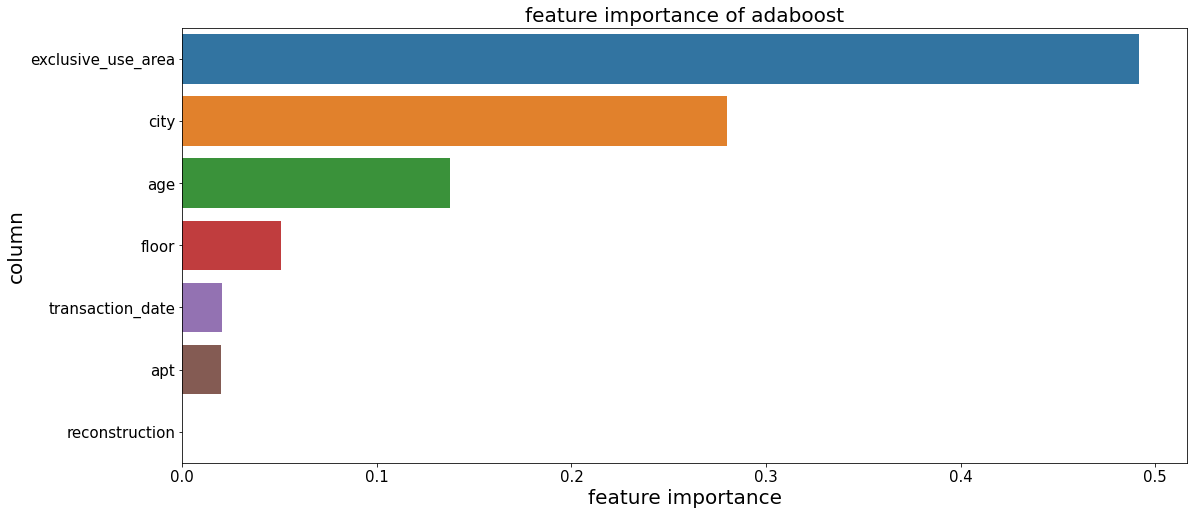

---

## 3.2 GBM(Gradient Boosting Machine)

Îã§ÏùåÏúºÎ°ú GBMÏóê ÎåÄÌï¥ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§. GBMÏùÄ Ïù¥Î¶ÑÏóêÏÑúÎ∂ÄÌÑ∞ Í∑∏ ÏùòÎØ∏Î•º ÎÇ¥Ìè¨ÌïòÍ≥† ÏûàÎãµÎãàÎã§ üòÉ

<font color=red>**GBM(Gradient Boosting Machine)**</font>ÏùÄ AdaBoostÏôÄ Ïú†ÏÇ¨ÌïòÏßÄÎßå, <br>
Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏Î•º <font color=blue>Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ï(Gradient Descent)</font>ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏµúÏ†ÅÌôîÎêú Í≤∞Í≥ºÎ•º ÏñªÎäî Î∞©Î≤ïÎ°†Ïù¥ÏóêÏöî. (ÏïÑÎãà Í∏ÄÏéÑ, Ïû†ÍπêÎßåÏöî. ÎÑàÎ¨¥ Ïñ¥Î†§Ïö¥ Í±∞ ÏïÑÎãåÍ∞ÄÏöî...? üòÇ)

Ïó¨Í∏∞ÏÑú <font color=blue>Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï</font>Ïù¥ÎûÄ, Ïã§Ï†úÍ∞í yÏôÄ ÏòàÏ∏°Í∞í $\widehat{y}$ ÏÇ¨Ïù¥Ïùò <font color=green>Ïò§Ï∞®Í∞Ä ÏµúÏÜå</font>Í∞Ä ÎêòÎèÑÎ°ù Î∞òÎ≥µÏ†ÅÏúºÎ°ú Í∞ÄÏ§ëÏπò Í∞íÏùÑ ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§.

Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏ Ìï† Îïå Ìï¥Îãπ ÏúÑÏπòÏùò **ÎØ∏Î∂ÑÍ∞íÏùò Î∂ÄÌò∏ÏôÄ Î∞òÎåÄ**Î°ú Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî Í≤ÉÏù¥ Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ïÏùò ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥ÏûÖÎãàÎã§!

ÏòàÎ•º Îì§Ïñ¥, ÏïÑÎûò ÏÇ¨ÏßÑÏ≤òÎüº ÌòÑÏû¨ ÏúÑÏπòÏùò Í∏∞Ïö∏Í∏∞Îäî ÏùåÏàòÏûÖÎãàÎã§.

Îî∞ÎùºÏÑú Îã§Ïùå ÏúÑÏπòÎ°ú Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏Ìï† ÎïåÎäî Ïù¥ÏôÄ Î∞òÎåÄÏù∏ ÏñëÏàò Î∞©Ìñ•ÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ≤å Îê©ÎãàÎã§.

Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÏùÄ <font color=red>Îß§Ïö∞ Ï§ëÏöîÌïú Í∞úÎÖê</font>Ïù¥Îãà, Ïö∞Î¶¨ 3Î≤à, ÏïÑÎãà 4Î≤à ÏùΩÍ≥† ÎÑòÏñ¥Í∞ÄÏöî! ‚≠ê‚≠ê‚≠ê

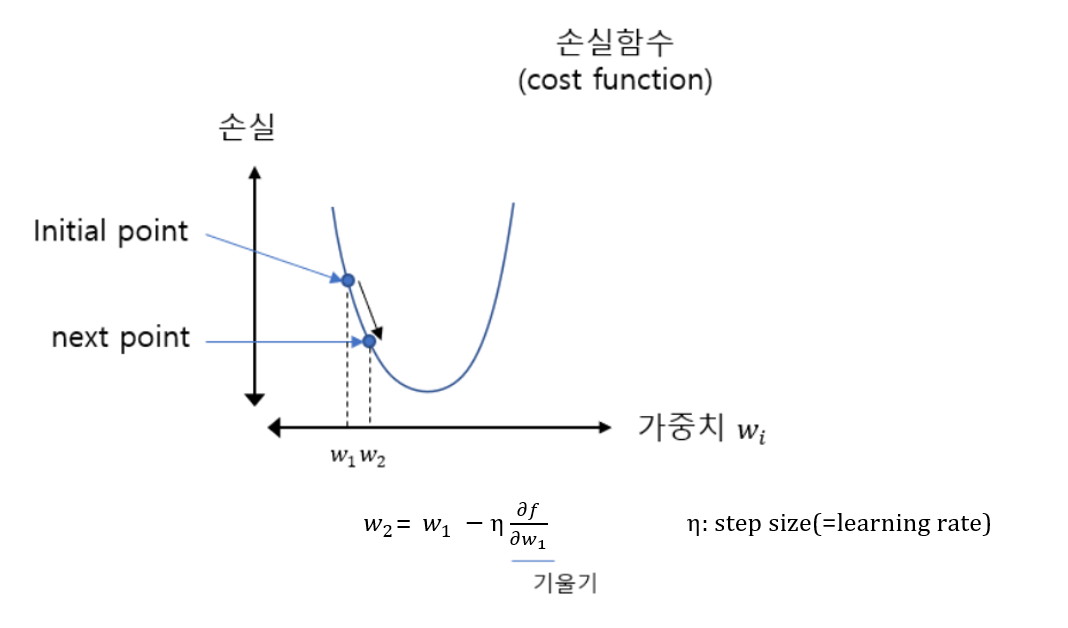

>Ï∂úÏ≤ò : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=tinz6461&logNo=221589073944

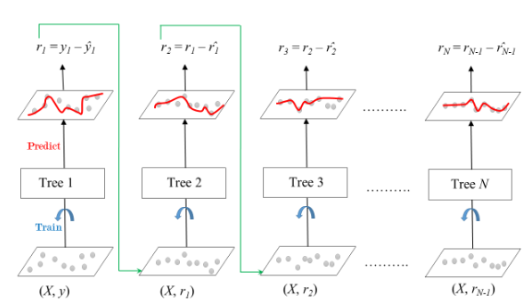

>Ï∂úÏ≤ò : https://www.geeksforgeeks.org/ml-gradient-boosting/

**GBM**ÏùÄ Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê AdaboostÏôÄ Îã¨Î¶¨ **ÏÉàÎ°úÏö¥ weak learnerÏóê ÎåÄÌï¥ ÏÉàÎ°úÏö¥ ÌïôÏäµÎç∞Ïù¥ÌÑ∞(x)Î•º ÎßåÎì§ÏßÄ ÏïäÏäµÎãàÎã§.**

Îç∞Ïù¥ÌÑ∞(x)Îäî Í∑∏ÎåÄÎ°ú ÎëêÍ≥†, Ï∂îÏ†ïÌï¥Ïïº Ìï† yÍ∞íÏùÑ Î™ª ÎßûÌûå ÏûîÏ∞®ÎßåÌÅº Î∫Ä ÏÉàÎ°úÏö¥ yÎ°ú Î∞îÍæ∏Î©¥ÏÑú ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÍ≤å Îê©ÎãàÎã§. 

Ï¶â, GBMÏùÄ Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÏùÑ ÌÜµÌï¥ <font color=green>ÎßûÌûàÏßÄ Î™ªÌïú yÍ∞íÏóê ÏßëÏ§ë</font>ÌïòÎäî Î∞©Î≤ïÎ°† ÏûÖÎãàÎã§. 

ÌïòÏßÄÎßå GBMÏùÄ ÏòàÏ∏° ÏÑ±Îä•ÏùÄ Ï¢ãÏßÄÎßå Í≥ºÏ†ÅÌï©Ïù¥ ÏûêÏ£º ÏùºÏñ¥ÎÇòÍ≥†, ÏÜçÎèÑÍ∞Ä ÎäêÎ¶¨Îã§Îäî Îã®Ï†êÏù¥ ÏûàÏñ¥Ïöî üò•<br>


---

### GBMÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞

Ïù¥Ï†ú GBMÏóêÏÑú ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Ïóê ÎåÄÌï¥ Í≥µÎ∂ÄÌï¥Î≥ºÍπåÏöî? üòä

- loss : GBMÏóê ÏÇ¨Ïö©ÎêòÎäî ÏÜêÏã§Ìï®ÏàòÎ•º ÏßÄÏ†ïÌï¥Ï£ºÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏûÖÎãàÎã§.

- learning_rate : GBMÏù¥ ÌïôÏäµÏùÑ ÏßÑÌñâ Ìï† ÎïåÎßàÎã§ Ï†ÅÏö©ÎêòÎäî ÌïôÏäµÎ•†ÏûÖÎãàÎã§. Í∏∞Îä•ÏùÄ AdaboostÏóêÏÑúÏùò learning rateÏôÄ Í∞ôÏäµÎãàÎã§.

- n_estimators : ÏïΩÌïú ÌïôÏäµÍ∏∞(weak learner)Ïùò Í∞úÏàòÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§. Í∏∞Îä•ÏùÄ AdaboostÏóêÏÑúÏùò learning rateÏôÄ Í∞ôÏäµÎãàÎã§.

- subsample : ÏïΩÌïú ÌïôÏäµÍ∏∞Í∞Ä ÌïôÏäµÏãú ÏÇ¨Ïö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅÏùò ÎπÑÏú®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. 

  ÏòàÎ•º Îì§Ïñ¥ 0.5Ïù∏ Í≤ΩÏö∞ Ï†ÑÏ≤¥ ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïùò 50%Îßå ÏÇ¨Ïö©ÌïúÎã§Îäî ÎúªÏù¥Î©∞, 0 ~ 1ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ñÏäµÎãàÎã§.

  subsampleÏùò Í∞íÏùÑ 1Î≥¥Îã§ ÏûëÏùÄ Í∞íÏúºÎ°ú ÏßÄÏ†ïÌïòÍ≤å Îêò,Î©¥ ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Ïùò Î∂ÄÏä§Ìä∏Îû© ÏÉòÌîåÎßÅÍ≥º Ïú†ÏÇ¨Ìïú Ìö®Í≥ºÎ•º ÌÜµÌï¥ Í≥ºÎåÄÏ†ÅÌï©(Ïò§Î≤ÑÌîºÌåÖ)ÏùÑ Ï§ÑÏùº Ïàò ÏûàÏäµÎãàÎã§.

AdaboostÏóêÏÑú learning_rateÏôÄ weak learnerÎäî ÏÑúÎ°ú Ïó∞Í¥ÄÏÑ±Ïù¥ ÌÅ¨Îã§Í≥† ÌñàÎçò Í≤É Í∏∞ÏñµÌïòÏãúÎÇòÏöî? 

GBMÏóêÏÑúÎèÑ Ïù¥Îü¨Ìïú Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.

Îî∞ÎùºÏÑú GBMÏóêÏÑúÎèÑ learning_rateÎ•º Î≥ÄÍ≤ΩÌï† Îïå n_estimatorsÎèÑ Ïù¥Ïóê ÎßûÍ≤å Î≥ÄÍ≤ΩÌï¥Ïïº Ìï©ÎãàÎã§.

---

### GBM Ïã§Ïäµ

Ïù¥Ï†ú GBMÏóê ÎåÄÌï¥ Î≥∏Í≤©Ï†ÅÏù∏ Ïã§ÏäµÏùÑ ÏßÑÌñâÌï† Í±¥Îç∞Ïöî.

 AdaBoostÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú sklearn Ìå®ÌÇ§ÏßÄÏóêÎäî sklearn.ensembleÏóê `GradientBoostingClassifier`, `GradientBoostingRegressor`Í∞Ä ÏûàÏäµÎãàÎã§. 

Ï†ÄÌù¨Îäî <font color=orange>**GradientBoostingRegressor**</font>Î•º Î∂àÎü¨Ïò¨Í≤åÏöî!

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

Í∑∏ ÌõÑ, Í∏∞Ï°¥Ïùò Îã§Î•∏ Î™®Îç∏Îì§ Ï≤òÎüº Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìïú ÌõÑ <font color=green>Î™®Îç∏Ïù¥Î¶Ñ.fit(ÌõàÎ†®Ìï† ÎèÖÎ¶ΩÎ≥ÄÏàò, ÌõàÎ†®Ìï† Ï¢ÖÏÜçÎ≥ÄÏàò)</font>Î•º Í∏∞ÏûÖÌï¥Ï£ºÎ©¥ ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÍ≤å Îê©ÎãàÎã§.

GBMÎèÑ Ïó¨Îü¨ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏßÄÏ†ïÌï† Ïàò ÏûàÎäîÎç∞Ïöî. 

ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú default Í∞íÏùÑ ÏÇ¨Ïö©ÌïòÎêò, random_state Í∞íÎßå 42Î°ú Í≥†Ï†ïÌï†Í≤åÏöî üìåüìåüìå

In [25]:
gbm = GradientBoostingRegressor(random_state = 42)

Îã§ÏùåÏúºÎ°ú ÌïôÏäµÏùÑ ÏßÑÌñâÌïú ÌõÑ, Ïö∞Î¶¨Í∞Ä ÎßåÎì† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÎÑ£Ïñ¥ÏÑú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌï¥Î≥ºÍ≤åÏöî! 

In [26]:
model_gbm =  gbm.fit(X_train, y_train)

In [27]:
gbm_pred = model_gbm.predict(X_test)

In [28]:
print('gradient boosting Regressor',RMSE(gbm_pred,y_test))

gradient boosting Regressor 0.344952607976526


GBM Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌñàÏùÑ Îïå, RMSEÍ∞Ä ÏïΩ 0.345Î°ú ÎÇòÏôîÏäµÎãàÎã§ üëß

ÏïûÏÑú Î∞∞Ïö¥ AdaBoostÎ≥¥Îã§Îäî Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Îäî Í≤É Í∞ôÎÑ§Ïöî!

---

### GBMÏùò feature importance

GBM ÎòêÌïú AdaBoostÏ≤òÎüº <font color=orange>**fitÎêú Î™®Îç∏.feature_importances_**</font>Î•º ÌÜµÌï¥ Í∞Å ÏπºÎüºÎì§Ïù¥ Ìï¥Îãπ Î™®Îç∏ÏóêÏÑú ÏñºÎßàÎÇò Ï§ëÏöîÌïúÏßÄÎ•º ÏàòÏπòÎ°ú Î≥¥Ïó¨Ï§çÎãàÎã§.

In [29]:
gbm.feature_importances_

array([0.46226984, 0.01685913, 0.04987574, 0.46524176, 0.        ,
       0.        , 0.00575353])

GBMÏùò featue importanceÎèÑ Í∞ÅÍ∞ÅÏùò Í∞íÏùÄ X Ïª¨ÎüºÍ≥º ÏàúÏÑúÎåÄÎ°ú ÎåÄÏùëÌï©ÎãàÎã§. 

 `pd.DataFrame()`Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì§Í≥†, Ï†ïÎ†¨Ìïú ÌõÑÏóê Í∞ÄÎ°úÎ°ú Îêú <font color=blue>barplot</font>ÏùÑ Í∑∏Î†§Î≥¥Í≤†ÏäµÎãàÎã§.

In [30]:
gbm_feature_importance = pd.DataFrame(gbm.feature_importances_, X_test.columns , columns =['feature importance'])

In [31]:
gbm_feature_importance

feature importance
exclusive_use_area            0.462270
floor                         0.016859
age                           0.049876
city                          0.465242
transaction_date              0.000000
reconstruction                0.000000
apt                           0.005754

In [32]:
gbm_feature_importance = gbm_feature_importance.sort_values('feature importance', ascending = False)

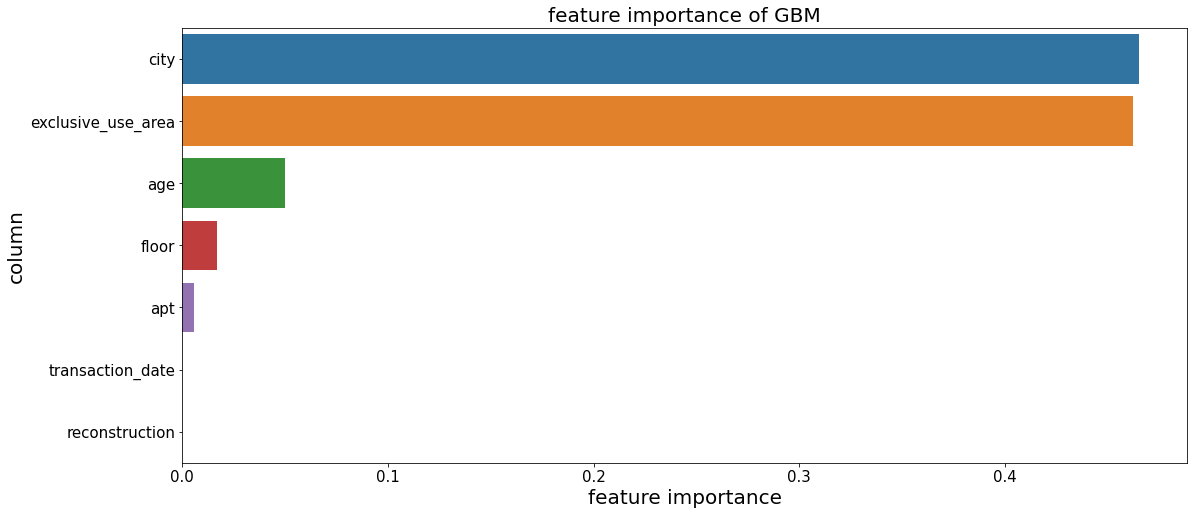

In [33]:
# seabornÏùò barplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î≥ÄÏàòÏùò Ï§ëÏöîÎèÑ ÏàúÏÑúÎåÄÎ°ú ÎÇòÌÉÄÎÇ¥Î¥ÖÏãúÎã§.

plt.figure(figsize = (18,8))
sns.barplot(x ='feature importance', y =gbm_feature_importance.index ,orient='h', data = gbm_feature_importance)
plt.title('feature importance of GBM', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('feature importance', size = 20)
plt.ylabel('column', size = 20)
plt.show()

Í∑∏Îü∞Îç∞ feature importanceÏùò ÌÅ¨Í∏∞Î•º ÏÇ¥Ìé¥Î≥¥Îãà, ÏïÑÍπå AdaBoostÏóêÏÑúÏùò Í∞íÎì§Í≥º Ï∞®Ïù¥Í∞Ä ÌÅ¨ÎÑ§Ïöî! 

ÌòπÏãú Ïö∞Î¶¨Í∞Ä Î≠îÍ∞Ä ÏûòÎ™ªÌïú Í±∏ÍπåÏöî? üí¶üí¶



ÏïÑÎá®! Ï†àÎåÄ ÏïÑÎãôÎãàÎã§. <br>
Îã§ÌñâÌûàÎèÑ Ïù¥Í±¥ ÏßÄÍ∑πÌûà Ï†ïÏÉÅÏ†ÅÏù∏ Í≤∞Í≥ºÏûÖÎãàÎã§ üòåüòå



feature importanceÎäî Î™®Îç∏ÎßàÎã§ Í∞íÏù¥ Îã§Î•∏Îç∞Ïöî. 

Í∑∏ Ïù¥Ïú†Îäî Î™®Îç∏ÎßàÎã§ <font color=green>Î∞©Î≤ïÎ°†</font>Ïù¥ Îã¨ÎùºÏÑú, <font color=green>Î≥ÄÏàòÎ•º Ï∑®Í∏âÌïòÎäî Ï†ïÎèÑ</font>ÎèÑ Îã¨ÎùºÏßÄÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

GBM Ïù¥ÌõÑ GBMÏùò Îã®Ï†êÏù∏ Í≥ºÏ†ÅÌï©, ÎäêÎ¶∞ ÏÜçÎèÑÎ•º Í∞úÏÑ†ÌïòÍ≥†Ïûê Ïó¨Îü¨ ÌååÏÉù Î™®Îç∏Ïù¥ ÎÇòÏôîÎäîÎç∞Ïöî.

Ïù¥Îì§ Ï§ë ÏùºÎ∂ÄÎäî GBMÏùò Îã®Ï†êÏùÑ Í∞úÏÑ†ÌïòÎ©¥ÏÑú Î™®Îç∏Ïùò ÏÑ±Îä•ÎèÑ Í∞úÏÑ†ÏãúÏº∞Ïñ¥Ïöî! üëçÔ∏èüëçÔ∏èüëçÔ∏è



Í∑∏Îüº Îã§Ïùå ÌååÌä∏ÏóêÏÑúÎäî GBMÏùò ÌååÏÉù Î™®Îç∏ Ï§ë ÌïòÎÇòÏù∏ **XGBoost**Ïóê ÎåÄÌï¥ ÏïåÏïÑÎ≥ºÍπåÏöî?

---

## 3.4 XGBoost

<font color=red>**XGBoost**</font>Îäî `Ïñ¥ÎñªÍ≤å ÌïòÎ©¥ GBMÏù¥ Îçî Îπ†Î•¥Í≥† Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ ÎÇ¥Í≤åÎÅî ÎßåÎì§ Ïàò ÏûàÏùÑÍπå?`Î°úÎ∂ÄÌÑ∞ Í≥†ÏïàÎêú Î∞©Î≤ïÎ°†ÏûÖÎãàÎã§. 

XGBÏùò ÌäπÏßïÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

* **<font color=orange>GBMÏóê ÎπÑÌï¥ Îõ∞Ïñ¥ÎÇú ÏòàÏ∏° ÏÑ±Îä•</font>**

* **<font color=orange>GBMÏóê ÎπÑÌï¥ ÏßßÏùÄ ÏàòÌñâ ÏãúÍ∞Ñ</font>**

* **<font color=orange>Í≤∞Ï∏°Í∞í ÏûêÏ≤¥ Ï≤òÎ¶¨ Í∏∞Îä• Ï°¥Ïû¨</font>**

* **<font color=orange>ÎÇòÎ¨¥ Í∞ÄÏßÄÏπòÍ∏∞(Tree pruning)</font>**
    * **max_depth**ÎùºÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïòÏßÄÎßå, Îçî Ïù¥ÏÉÅ Í∏çÏ†ï Ïù¥ÎìùÏù¥ ÏóÜÎäî Î∂ÑÌï†ÏùÑ Í∞ÄÏßÄÏπòÍ∏∞Ìï¥ÏÑú Î∂ÑÌï† Ïàò Í∞êÏÜå

* **<font color=orange>early stopping</font>**
    * ÌïôÏäµÏãúÌÇ¨ Îïå ÌïôÏäµ ÌöüÏàòÎ•º ÏÇ¨Ï†ÑÏóê ÏÑ§Ï†ïÌï¥Ï§çÎãàÎã§. Ïù¥Ïóê, Early StoppingÏùÄ ÏÑ±Îä• Í∞úÏÑ†(error Í∞êÏÜå) ÎêòÍ≥† ÏûàÎäîÏßÄÎ•º Í¥ÄÏ∞∞ÌïòÎäî Í∞êÏãúÏûê Ïó≠Ìï†ÏùÑ ÌïòÍ≤å Îê©ÎãàÎã§.
    * Í∞êÏãúÌïòÎã§Í∞Ä ÏÑ±Îä•Ïù¥ Î≥ÄÌôîÍ∞Ä ÏóÜÍ±∞ÎÇò ÎØ∏ÎØ∏ÌïòÎã§Í≥† ÌåêÎã®ÎêòÎ©¥, ÏÇ¨Ï†ÑÏóê ÏÑ§Ï†ïÌïú ÌïôÏäµÌöüÏàòÏóê ÎèÑÎã¨ÌïòÏßÄ ÏïäÏïòÎçîÎùºÎèÑ Í≥ºÏ†ÅÌï©ÎêòÏßÄ ÏïäÎèÑÎ°ù ÌïôÏäµÏùÑ Ï§ëÎã®ÏãúÌÇµÎãàÎã§.
    * XGBÍ∞Ä early stoppingÏù¥ Í∞ÄÎä•Ìïú Ïù¥Ïú†Îäî <font color=blue>ÎÇ¥Ïû•Îêú ÏûêÏ≤¥ Í≤ÄÏ¶ù</font> Í∏∞Îä•ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

---

### XGBoostÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞

XGBoostÏóêÏÑúÎèÑ ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïòÎäîÎç∞Ïöî. ÌïúÎ≤à ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§!

* learning_rate : XGBoostÍ∞Ä ÌïôÏäµÏùÑ ÏßÑÌñâ Ìï† ÎïåÎßàÎã§ Ï†ÅÏö©ÎêòÎäî ÌïôÏäµÎ•†ÏûÖÎãàÎã§. Í∏∞Îä•ÏùÄ AdaboostÏóêÏÑúÏùò learning rateÏôÄ Í∞ôÏäµÎãàÎã§.

* n_estimators : ÏïΩÌïú ÌïôÏäµÍ∏∞(weak learner)Ïùò Í∞úÏàòÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§. Í∏∞Îä•ÏùÄ AdaboostÏóêÏÑúÏùò learning rateÏôÄ Í∞ôÏäµÎãàÎã§.

* max_depth : Ìä∏Î¶¨Ïùò ÏµúÎåÄ ÍπäÏù¥Î•º ÏßÄÏ†ïÌï¥Ï§çÎãàÎã§. Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÌïôÏäµÌïòÏßÄÎßå Í≥ºÎåÄÏ†ÅÌï©Ïù¥ Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏÉùÍπÅÎãàÎã§.

* subsample : ÏïΩÌïú ÌïôÏäµÍ∏∞Í∞Ä ÌïôÏäµÏãú ÏÇ¨Ïö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅÏùò ÎπÑÏú®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

* colsample_bytree : Í∞Å ÌïôÏäµÍ∏∞Î≥Ñ featureÏùò ÏÉòÌîåÎßÅ ÎπÑÏú®ÏùÑ ÎúªÌï©ÎãàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú 0.5 ~ 1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.

* early_stopping_round : ÏÑ±Îä• Î≥ÄÌôîÍ∞Ä ÏóÜÍ±∞ÎÇò ÎØ∏ÎØ∏ÌïòÎã§ ÌåêÎã®ÎêòÎ©¥ ÏÇ¨Ï†ÑÏóê ÏÑ§Ï†ïÌïú ÌïôÏäµÌöüÏàòÏóê ÎèÑÎã¨ÌïòÏßÄ ÏïäÏïòÎçîÎùºÎèÑ Í≥ºÏ†ÅÌï©ÎêòÏßÄ ÏïäÎèÑÎ°ù ÌïôÏäµÏùÑ Ï§ëÎã®ÏãúÌÇµÎãàÎã§.

---

### XGBoost Ïã§Ïäµ

XGBoost Ìå®ÌÇ§ÏßÄÏóêÎäî <font color=green>sklearnÍ≥º Ìò∏ÌôòÎêòÏßÄÏïäÎäî XGBoostÎ™®Îìà</font>Í≥º <font color=green>sklearnÍ≥º Ìò∏ÌôòÎêòÎäî XGBoostÎ™®Îìà</font>Ïù¥ ÏûàÏñ¥Ïöî.

Ìò∏ÌôòÏùÑ ÏúÑÌï¥ Ï†ÄÌù¨Îäî <font color=green>**sklearnÍ≥º Ìò∏ÌôòÎêòÎäî XGBoost Î™®Îìà**</font>ÏùÑ ÏÇ¨Ïö©Ìï¥Î≥ºÍªòÏöî!

ÏÇ¨Ïù¥ÌÇ∑Îü∞Í≥º Ìò∏ÌôòÎêòÎäî XGBoost Î™®ÎìàÏóêÎäî `XGBClassifier`ÏôÄ `XGBRegressor`Ïù¥ ÏûàÏäµÎãàÎã§. 

Ïö∞Î¶¨Îäî <font color=orange>**XGBRegressor**</font>Î•º Î∂àÎü¨ÏôÄÏÑú Ïã§ÏäµÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.

In [34]:
from xgboost import XGBRegressor

C:\Users\USER\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBRegressorÎäî ÏÇ¨Ïù¥ÌÇ∑Îü∞Í≥º Ìò∏ÌôòÏù¥ ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê ÏÇ¨Ïö©Î≤ïÏùÄ Îã§Î•∏ Î™®Îç∏Îì§Í≥º Ïú†ÏÇ¨Ìï©ÎãàÎã§.üòåüòå

Í∏∞Ï°¥Ïùò Îã§Î•∏ Î™®Îç∏Îì§ Ï≤òÎüº Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìïú ÌõÑ, <font color=orange>**Î™®Îç∏Ïù¥Î¶Ñ.fit(ÌõàÎ†®Ìï† x Î≥ÄÏàò, ÌõàÎ†®Ìï† y Î≥ÄÏàò)**</font>Î•º Í∏∞ÏûÖÌï¥Ï£ºÎ©¥ ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÍ≤å Îê©ÎãàÎã§. 


Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî ÎÇ¥Ïû•ÎêòÏñ¥ ÏûàÎäî ÏûêÏ≤¥ Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ <font color=blue>early stopping</font>ÏùÑ ÏàòÌñâÌï¥Î≥ºÍ≤åÏöî!

Î™®Îëê Ïûò Îî∞ÎùºÏò¨ Ï§ÄÎπÑ ÎêêÏ£†? üíü


ÏûêÏ≤¥ Í≤ÄÏ¶ùÏùÑ ÏúÑÌï¥ ÎÇ¥Ïû•ÎêòÏñ¥ ÏûàÎäî ÏûêÏ≤¥ Í≤ÄÏ¶ùÏùÑ ÏàòÌñâÌïòÎ†§Î©¥ <font color=green>Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(validation data)</font>Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.

Ïù¥Î•º ÏúÑÌï¥ train dataÎ•º Îã§Ïãú Ìïú Î≤à Î∂ÑÌï†ÌïòÍ≤†ÏäµÎãàÎã§.

In [35]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,test_size = 0.25, random_state = 42)

early stoppingÏùÑ ÏúÑÌï¥ ÌïÑÏöîÌïú ÌååÎùºÎØ∏ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§

* **<font color=green>early_stopping_rounds</font>** : ÌèâÍ∞Ä ÏßÄÌëúÍ∞Ä Ìñ•ÏÉÅÎê† Ïàò ÏûàÎäî Î∞òÎ≥µ ÌöüÏàòÎ•º Ï†ïÏùò
* **<font color=green>eval_metric</font>** : Ï°∞Í∏∞ Ï§ëÎã®ÏùÑ ÏúÑÌïú ÌèâÍ∞Ä ÏßÄÌëú
* **<font color=green>eval_set</font>** : ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÏàòÌñâÌï† Îç∞Ïù¥ÌÑ∞


Ïö∞Î¶¨Îäî <font color=purple>**RMSE**</font>Î•º Í≤ÄÏ¶ùÏùò ÏßÄÌëúÎ°ú ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§!

RMSE Í∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞íÏùò Î≥ÄÌôîÍ∞Ä ÏóÜÍ±∞ÎÇò Î≥ÄÌôîÍ∞Ä ÎØ∏ÎØ∏ÌïòÎ©¥ ÌïôÏäµÏùÑ Ï¢ÖÎ£åÌïòÍ≤å Îê©ÎãàÎã§.
 


ÎòêÌïú <font color=purple>**early_stopping_rounds=50**</font>ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ 50Î≤à Î∞òÎ≥µÌïòÎäî ÎèôÏïà, ÏÑ±Îä•ÌèâÍ∞Ä ÏßÄÌëúÍ∞Ä Ìñ•ÏÉÅÎêòÏßÄ ÏïäÏúºÎ©¥ ÌïôÏäµÏùÄ Î©àÏ∂îÍ≤å Îê©ÎãàÎã§. <br>



<font color=purple>**eval_set**</font>ÏóêÎäî Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÌïôÏäµÏóê ÏÇ¨Ïö©Îê† Îç∞Ïù¥ÌÑ∞ÏôÄ ÌèâÍ∞ÄÏóê ÏÇ¨Ïö©Îê† Îç∞Ïù¥ÌÑ∞Î•º (x,y)ÏåçÏùò **Î¶¨Ïä§Ìä∏** ÌòïÌÉúÎ°ú ÏûÖÎ†•Ìï©ÎãàÎã§.

In [36]:
xgb =  XGBRegressor(objective='reg:squarederror', random_state = 42)

In [37]:
model_xgb =  xgb.fit(X_tr, y_tr, eval_set =[(X_tr, y_tr), (X_val, y_val)], eval_metric = 'rmse', early_stopping_rounds=50)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-rmse:6.88661	validation_1-rmse:6.88851
[1]	validation_0-rmse:4.82742	validation_1-rmse:4.82915
[2]	validation_0-rmse:3.38853	validation_1-rmse:3.39012
[3]	validation_0-rmse:2.38487	validation_1-rmse:2.38640
[4]	validation_0-rmse:1.68734	validation_1-rmse:1.68882
[5]	validation_0-rmse:1.20575	validation_1-rmse:1.20709
[6]	validation_0-rmse:0.87769	validation_1-rmse:0.87888
[7]	validation_0-rmse:0.65918	validation_1-rmse:0.66025
[8]	validation_0-rmse:0.51926	validation_1-rmse:0.52015
[9]	validation_0-rmse:0.43382	validation_1-rmse:0.43454
[10]	validation_0-rmse:0.38469	validation_1-rmse:0.38522
[11]	validation_0-rmse:0.35780	validation_1-rmse:0.35822
[12]	validation_0-rmse:0.34330	validation_1-rmse:0.34360
[13]	validation_0-rmse:0.33532	validation_1-rmse:0.33555
[14]	validation_0-rmse:0.33129	validation_1-rmse:0.33143
[15]	validation_0-rmse:0.32880	validation_1-rmse:0.32896
[16]	validation_0-rmse:0.32678	validation_1-rmse:0.32687
[17]	validation_0-rmse:0.32586	validation

In [38]:
xgb_pred = model_xgb.predict(X_test)

In [39]:
print('XGB',RMSE(xgb_pred,y_test))

XGB 0.29701350932423176


Í≤∞Í≥ºÎ•º Î≥¥Îãà early stoppingÏùÄ Ï†ÅÏö©ÎêòÏßÄ ÏïäÏïòÍ≥† RMSE Í∞íÏùÄ ÏïΩ 0.3445Í∞Ä ÎÇòÏôîÎÑ§Ïöî!üí™

---

### XGBoostÏùò feature importance

XGBoostÎèÑ feature importanceÎ•º Î≥º Ïàò ÏûàÎäîÎç∞Ïöî. Î∞©Î≤ïÏùÄ ÏúÑÏóêÏÑú ÌñàÎçò Í≤ÉÍ≥º ÏôÑÎ≤ΩÌûà Í∞ôÏäµÎãàÎã§ üòÜ

In [40]:
xgb.feature_importances_

array([9.9182233e-02, 1.9517016e-02, 2.4123408e-02, 8.4289724e-01,
       6.2664214e-04, 0.0000000e+00, 1.3653402e-02], dtype=float32)

XGBoostÏùò featue importanceÎèÑ Í∞ÅÍ∞ÅÏùò Í∞íÏùÄ X Ïª¨ÎüºÍ≥º ÏàúÏÑúÎåÄÎ°ú ÎåÄÏùëÌï©ÎãàÎã§. 

 `pd.DataFrame()`Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì§Í≥† Ïù¥Î•º ÏÇ¨Ïö©Ìï¥ÏÑú ÏúÑÏóêÏÑúÏ≤òÎüº Í∞ÄÎ°úÎ°ú Îêú barplotÏùÑ Í∑∏Î†§Î≥ºÍªòÏöî. 

(Î¨ºÎ°†, ÏßÄÍ∏àÍπåÏßÄ barplotÏùÑ Îß§Ïö∞ ÎßéÏù¥ Í∑∏Î†§Î¥§Í∏∞ ÎïåÎ¨∏Ïóê, Ïó¨Îü¨Î∂ÑÏù¥ ÏãúÏãúÌïòÎã§Í≥† ÎäêÎÅºÏã§ ÏàòÎèÑ ÏûàÏùÑ Í≤É Í∞ôÏßÄÎßåÏöî üò•)

In [41]:
xgb_feature_importance = pd.DataFrame(xgb.feature_importances_, X.columns , columns =['feature importance'])

In [42]:
xgb_feature_importance

feature importance
exclusive_use_area            0.099182
floor                         0.019517
age                           0.024123
city                          0.842897
transaction_date              0.000627
reconstruction                0.000000
apt                           0.013653

In [43]:
xgb_feature_importance = xgb_feature_importance.sort_values('feature importance', ascending = False)

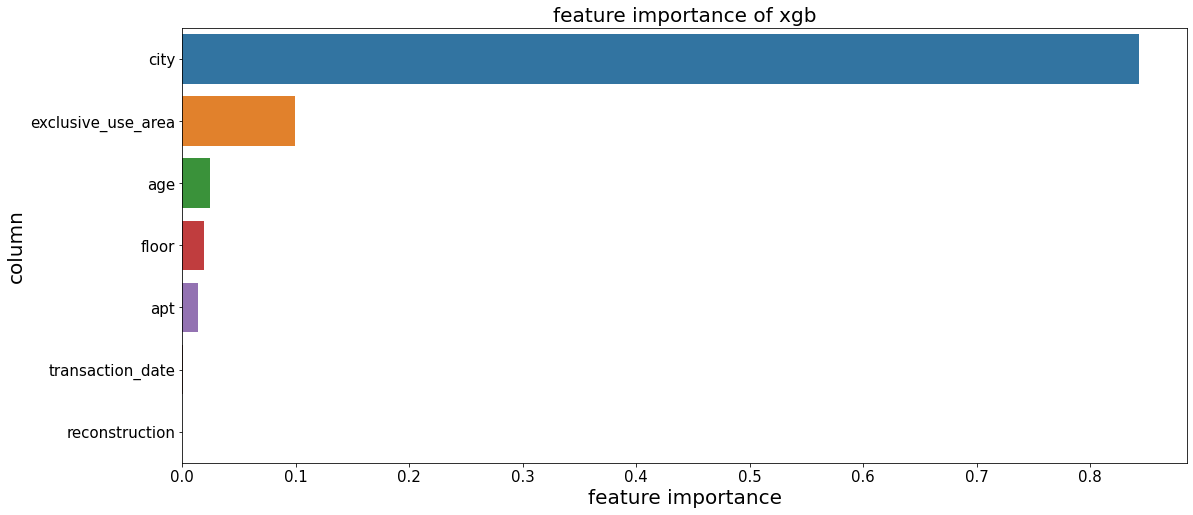

In [44]:
# seabornÏùò barplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î≥ÄÏàòÏùò Ï§ëÏöîÎèÑ ÏàúÏÑúÎåÄÎ°ú ÎÇòÌÉÄÎÇ¥Î¥ÖÏãúÎã§.

plt.figure(figsize = (18,8))
sns.barplot(x ='feature importance', y =xgb_feature_importance.index ,orient='h', data = xgb_feature_importance)
plt.title('feature importance of xgb', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('feature importance', size = 20)
plt.ylabel('column', size = 20)
plt.show()

ÏïûÏóêÏÑú Ïñ∏Í∏âÌñàÎçòÍ≤É Ï≤òÎüº Î™®Îç∏ÎßàÎã§ Ïñ¥Îñ§ Î≥ÄÏàòÎ•º ÏñºÎßàÎÇò Ï§ëÏöîÌïòÍ≤å ÏÉùÍ∞ÅÌïòÎäîÏßÄÎäî Îã§Î¶ÖÎãàÎã§.

XGBoostÎäî exclusive_use_areaÎ≥¥Îã§ <font color=green>**city**</font>Î•º Îçî Ï§ëÏöîÌïú Î≥ÄÏàòÎ°ú ÏÉùÍ∞ÅÌñàÎÑ§Ïöî!

---

## 3.5 Light GBM

Îã§ÏùåÏúºÎ°ú GBMÏùò Îòê Îã§Î•∏ ÌååÏÉù Î™®Îç∏Ïù∏ Light GBMÏóê ÎåÄÌï¥ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§. 

stage 5Í∞Ä Í±∞Ïùò Îã§ ÎÅùÎÇòÍ∞ÄÎãà, Ïö∞Î¶¨ Ï°∞Í∏àÎßå Îçî ÌûòÎÇ¥Î¥êÏöî! üí™üí™

Light GBMÏùÄ XGBoostÍ∞Ä Î∞úÌëúÎêòÍ≥† ÎÇòÏÑú, 2ÎÖÑ ÌõÑÏóê Î∞úÌëúÎêòÏóàÎäîÎç∞Ïöî.

XGBoostÏùò Îã®Ï†êÏùÑ Î≥¥ÏôÑÌïú Î™®Îç∏ÏûÖÎãàÎã§.

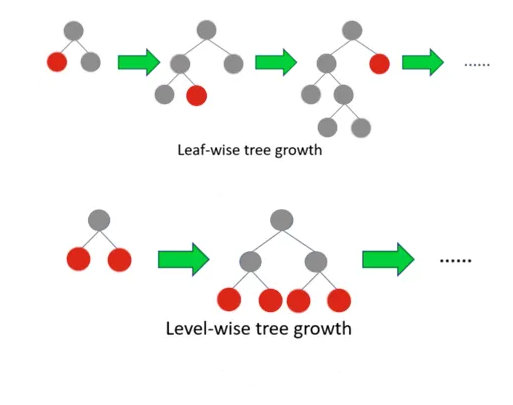

>Ï∂úÏ≤ò : https://medium.com/data-reply-it-datatech/lightgbm-for-timeseries-forecasting-408971289a12

<font color=red>**Light GBM**</font>ÏùÄ <font color=green>**Ìä∏Î¶¨ ÏÑ±Ïû• Î∞©Ïãù**</font>ÏóêÏÑú Îã§Î•∏ GBM Í≥ÑÏó¥Í≥º Îã§Î•∏ Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

ÏùºÎ∞òÏ†ÅÏù∏ GBMÍ≥ÑÏó¥ÏùÄ Í∑†Ìòï Ìä∏Î¶¨ Î∂ÑÌï†(Level-wise)Î∞©ÏãùÏùÑ ÌÜµÌï¥ Ìä∏Î¶¨Î•º Î∂ÑÌï†ÌïòÎ©¥ÏÑú ÏÑ±Ïû•Ìï©ÎãàÎã§. Ïù¥Îäî Ìä∏Î¶¨Î•º ÏàòÌèâÏ†ÅÏúºÎ°ú ÌÇ§Ïö¥Îã§Îäî ÎúªÏûÖÎãàÎã§.<br> 
Ïù¥Î•º ÌÜµÌï¥ Ìä∏Î¶¨Ïùò ÍπäÏù¥Î•º ÏµúÏÜåÌôîÌïòÍ≥† Í≥ºÏ†ÅÌï©ÎèÑ Î∞©ÏßÄÌï† Ïàò ÏûàÏäµÎãàÎã§. <br>
ÌïòÏßÄÎßå Ìä∏Î¶¨Î•º Í∑†ÌòïÏ†ÅÏúºÎ°ú ÎßåÎì§Í∏∞ ÏúÑÌïú Ï∂îÍ∞Ä Ïó∞ÏÇ∞Ïù¥ ÌïÑÏöîÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏÜçÎèÑÍ∞Ä ÎäêÎ¶ΩÎãàÎã§

Î∞òÎ©¥, Light GBMÏùÄ <font color=blue>**Î¶¨ÌîÑ Ï§ëÏã¨ Ìä∏Î¶¨ Î∂ÑÌï†(Leaf-wise)**</font>Î∞©ÏãùÏùÑ ÌÜµÌï¥ Ìä∏Î¶¨Î•º Î∂ÑÌï†ÌïòÎ©¥ÏÑú ÏÑ±Ïû•Ìï©ÎãàÎã§. <br>
Ïù¥Îäî ÏÑ±Îä•ÏùÑ Í∞ÄÏû• ÎÇÆÏ∂îÎäî(lossÍ∞Ä Í∞ÄÏû• ÌÅ∞) Í∞ÄÏßÄÎßå ÏÑ†ÌÉùÌï¥ lossÎ•º Ï§ÑÏó¨ÎÇòÍ∞ÄÎäî Î∞©ÏãùÏûÖÎãàÎã§.<br>
Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê, ÏúÑ Í∑∏Î¶ºÏóêÏÑú Î≥º Ïàò ÏûàÎìØÏù¥ Î∂àÍ∑†ÌòïÌïòÍ≤å ÏÑ±Ïû•ÌïòÏ£†.

Îî∞ÎùºÏÑú Light GBMÏùÄ Î¶¨ÌîÑ Ï§ëÏã¨ Ìä∏Î¶¨ Î∂ÑÌï†Î∞©ÏãùÏùÑ ÌÜµÌï¥ <font color=green>ÏòàÏ∏° Ïò§Î•òÎ•º ÏµúÏÜåÌôî</font>Ìï† Ïàò ÏûàÏäµÎãàÎã§. <br>
ÎòêÌïú, Í∑†Ìòï Ïú†ÏßÄÎ•º ÏúÑÌïú Ï∂îÍ∞Ä Ïó∞ÏÇ∞Ïù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏÜçÎèÑÍ∞Ä Îπ†Î¶ÖÎãàÎã§.

Light GBMÏùò ÌäπÏÑ±ÏùÑ ÏöîÏïΩÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

* **<font color=orange>ÏßßÏùÄ ÌïôÏäµ ÏãúÍ∞Ñ</font>**

* **<font color=orange>Ï†ÅÏùÄ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ</font>**

* **<font color=orange>Categorical FeatureÎì§ÏùÑ ÏûêÎèôÎ≥ÄÌôò Î∞è Ïù¥Ïóê Îî∞Î•∏ ÎÖ∏Îìú Î∂ÑÌï† ÏàòÌñâ</font>**

* **<font color=orange>GPUÎ•º Ïù¥Ïö©Ìïú ÌïôÏäµ ÏßÄÏõê</font>**

* **<font color=orange>Í≥ºÏ†ÅÌï© Î∞úÏÉù Í∞ÄÎä•ÏÑ± Ï°¥Ïû¨</font>**
    * Îî∞ÎùºÏÑú Light GBMÏùÄ **ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞**ÏóêÏÑú Î≥¥Îã§ Î∞îÎûåÏßÅÌï®

---

### Light GBMÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞

Ïù¥Ï†ú Light GBMÏùò Ï£ºÏöî ÌååÎùºÎØ∏ÌÑ∞Ïóê ÎåÄÌï¥ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§.

- max_depth : Ìä∏Î¶¨Ïùò ÏµúÎåÄ ÍπäÏù¥Î•º Ï°∞Ï†àÌï©ÎãàÎã§. Light GBMÏùò Í≤ΩÏö∞ leaf-wiseÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ï†ÅÏ†àÌïú max_depthÏùò Ï°∞Ï†àÏù¥ Í≥ºÏ†ÅÌï©ÏùÑ ÎßâÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

- n_estimators : ÏïΩÌïú ÌïôÏäµÍ∏∞Ïùò Í∞úÏàòÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§.

- early_stopping_round : ÏÑ±Îä• Î≥ÄÌôîÍ∞Ä ÏóÜÍ±∞ÎÇò ÎØ∏ÎØ∏ÌïòÎã§ ÌåêÎã®ÎêòÎ©¥ ÏÇ¨Ï†ÑÏóê ÏÑ§Ï†ïÌïú ÌïôÏäµÌöüÏàòÏóê ÎèÑÎã¨ÌïòÏßÄ ÏïäÏïòÎçîÎùºÎèÑ Í≥ºÏ†ÅÌï©ÎêòÏßÄ ÏïäÎèÑÎ°ù ÌïôÏäµÏùÑ Ï§ëÎã®ÏãúÌÇµÎãàÎã§.

- learning_rate : Light GBMÏù¥ ÌïôÏäµÏùÑ ÏßÑÌñâ Ìï† ÎïåÎßàÎã§ Ï†ÅÏö©ÎêòÎäî ÌïôÏäµÎ•†ÏûÖÎãàÎã§. Í∏∞Îä•ÏùÄ Ïó¨ÌÉÄ Îã§Î•∏ Î∂ÄÏä§ÌåÖ Î™®Îç∏Îì§ÏóêÏÑúÏùò learning rateÏôÄ Í∞ôÏäµÎãàÎã§.

- subsample_for_bin : ÏµúÏ†Å Î∂ÑÌï† ÏßÄÏ†ê ÌÉêÏÉâÏóê ÏÇ¨Ïö©ÎêòÎäî ÌïòÎÇòÏùò Í∞ÑÍ≤©Ïóê ÎåÄÌïú ÌÅ¨Í∏∞ÏûÖÎãàÎã§.

* colsample_bytree : Í∞Å ÌïôÏäµÍ∏∞ÎßàÎã§ featureÏùò ÏÉòÌîåÎßÅ ÎπÑÏú®ÏùÑ ÎúªÌï©ÎãàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú 0.5~ 1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.

---

### Light GBM Ïã§Ïäµ

Light GBM Ìå®ÌÇ§ÏßÄÏóêÎäî <font color=green>sklearnÍ≥º Ìò∏ÌôòÎêòÏßÄÏïäÎäî Light GBMÎ™®Îìà</font>Í≥º <font color=green>sklearnÍ≥º Ìò∏ÌôòÎêòÎäî Light GBMÎ™®Îìà</font>Ïù¥ ÏûàÏñ¥Ïöî.

Ìò∏ÌôòÏùÑ ÏúÑÌï¥ Ï†ÄÌù¨Îäî <font color=green>**sklearnÍ≥º Ìò∏ÌôòÎêòÎäî LightGBM Î™®Îìà**</font>ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ <font color=orange>**LGBMRegressor**</font>Î•º Î∂àÎü¨ÏôÄÏÑú Ïã§ÏäµÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.

Î®ºÏ†Ä LGBMRegressorÏùÑ ÌÜµÌï¥ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º default Í∞íÏúºÎ°ú Í∞ñÎäî Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ **lgb**ÎùºÎäî Í∞ùÏ≤¥Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.

In [45]:
from lightgbm import LGBMRegressor

In [46]:
lgb = LGBMRegressor(random_state = 42)

Ïù¥ÌõÑ <font color=green>Î™®Îç∏Ïù¥Î¶Ñ.fit(ÌõàÎ†®Ìï† ÎèÖÎ¶ΩÎ≥ÄÏàò, ÌõàÎ†®Ìï† Ï¢ÖÏÜçÎ≥ÄÏàò)</font>Î•º Í∏∞ÏûÖÌï¥Ï£ºÎ©¥ ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÍ≤å Îê©ÎãàÎã§. 



Ïù¥Î≤à Ïã§ÏäµÏóêÎèÑ ÎÇ¥Ïû•ÎêòÏñ¥ ÏûàÎäî ÏûêÏ≤¥ Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ early stoppingÏùÑ ÏàòÌñâÌï¥Î≥º Í±¥Îç∞Ïöî!

Ïó¨Îü¨Î∂ÑÏù¥ Î≥µÏäµÌïòÏã§ Ïàò ÏûàÍ≤åÎÅî ÌÄ¥Ï¶àÎ°ú Ï§ÄÎπÑÌï¥Î¥§ÏäµÎãàÎã§ ‚úÖ‚úÖ

---

#### ÌÄ¥Ï¶à

In [ ]:
# light gbmÏóêÏÑú ÏûêÏ≤¥Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÌïôÏäµÏùÑ ÏàòÌñâÌï¥Ï£ºÏÑ∏Ïöî.

model_lgb =  lgb.fit(####ÏΩîÎìúÎ•º Ï±ÑÏõå Ï£ºÏÑ∏Ïöî####)

##### ÏÑ§Î™Ö

early stoppingÏù¥ 50, ÌèâÍ∞ÄÏßÄÌëúÎäî rmseÏù∏ ÏûêÏ≤¥ Í≤ÄÏ¶ùÏùÑ Ïã§ÏãúÌï¥Ï£ºÏÑ∏Ïöî.
(Îã®, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Îäî Í∏∞Ï°¥Ïóê ÏÉùÏÑ±Ìïú X_val,  y_val Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥Ï£ºÏÑ∏Ïöî.)

##### ÌíÄÏù¥-ÌûåÌä∏

early stoppingÏùÑ ÏúÑÌï¥ ÌïÑÏöîÌïú ÌååÎùºÎØ∏ÌÑ∞Îäî XGBÏóêÏÑúÏôÄ Ïú†ÏÇ¨ÌïòÍ≥†, ÏÇ¨Ïö©Î≤ï ÎòêÌïú Ïú†ÏÇ¨Ìï©ÎãàÎã§. ÏïÑÎûòÏùò ÏÑ§Î™ÖÏùÑ Ï∞∏Í≥†Ìï¥ÏÑú ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.

* **<font color=green>early_stopping_rounds</font>** : ÌèâÍ∞Ä ÏßÄÌëúÍ∞Ä Ìñ•ÏÉÅÎê† Ïàò ÏûàÎäî Î∞òÎ≥µ ÌöüÏàòÎ•º Ï†ïÏùò
* **<font color=green>eval_metric</font>** : Ï°∞Í∏∞ Ï§ëÎã®ÏùÑ ÏúÑÌïú ÌèâÍ∞Ä ÏßÄÌëú
* **<font color=green>eval_set</font>** : ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÏàòÌñâÌï† Îç∞Ïù¥ÌÑ∞


##### ÌíÄÏù¥-Ï†ïÎãµ

```
#light gbmÏóêÏÑú ÏûêÏ≤¥Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÌïôÏäµÏùÑ ÏàòÌñâÌï¥Ï£ºÏÑ∏Ïöî.

model_lgb =  lgb.fit(X_tr, y_tr, eval_set =[(X_tr, y_tr), (X_val, y_val)], eval_metric = 'rmse', early_stopping_rounds=50)
```

---

Ïó¨Îü¨Î∂Ñ, ÌÄ¥Ï¶à Ïûò ÌíÄÏñ¥ Î≥¥ÏÖ®ÎÇòÏöî? üëèüëèüëè

Ïù¥Ï†ú test Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌï¥Î≥ºÍ≤åÏöî!

In [48]:
lgb_pred = model_lgb.predict(X_test)

In [49]:
print('LGB',RMSE(lgb_pred,y_test))

LGB 0.3234525519060052


RMSEÍ∞Ä ÏïΩ 0.323Ïù¥ ÎÇòÏôîÎÑ§Ïöî! ÌôïÏã§Ìûà GBMÏóê ÎπÑÌï¥ ÏÑ±Îä•Ïù¥ Í∞úÏÑ†Îêú Í≤É Í∞ôÏïÑÏöî üíú

---

### Light GBMÏùò feature importance

Light GBMÎèÑ <font color=orange>**fitÎêú Î™®Îç∏.feature_importances_**</font>Î•º ÌÜµÌï¥ feature importanceÎ•º Î≥º Ïàò ÏûàÎãµÎãàÎã§!

In [50]:
lgb.feature_importances_

array([1220,  287,  810,  142,    8,    0,  533])

ÏÇ¨Ïö©Î≤ïÏùÄ Îã§Î•∏ Î™®Îç∏Îì§Í≥º ÎèôÏùºÌïòÎãà, Î∞îÎ°ú Ïã§ÏäµÌï¥Î¥ÖÏãúÎã§!

In [51]:
lgb_feature_importance = pd.DataFrame(lgb.feature_importances_, X.columns , columns =['feature importance'])

In [52]:
lgb_feature_importance

feature importance
exclusive_use_area                1220
floor                              287
age                                810
city                               142
transaction_date                     8
reconstruction                       0
apt                                533

In [53]:
lgb_feature_importance = lgb_feature_importance.sort_values('feature importance', ascending = False)

feature importance Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Îäî Î∞©Î≤ïÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Ï†ÅÏö©Ìï¥Î≥¥Î©¥ÏÑú, Ïù¥Î≤à Í∏∞ÌöåÏóê Ï†úÎåÄÎ°ú ÏùµÌòÄÎ¥ÖÏãúÎã§ ‚úç‚úç

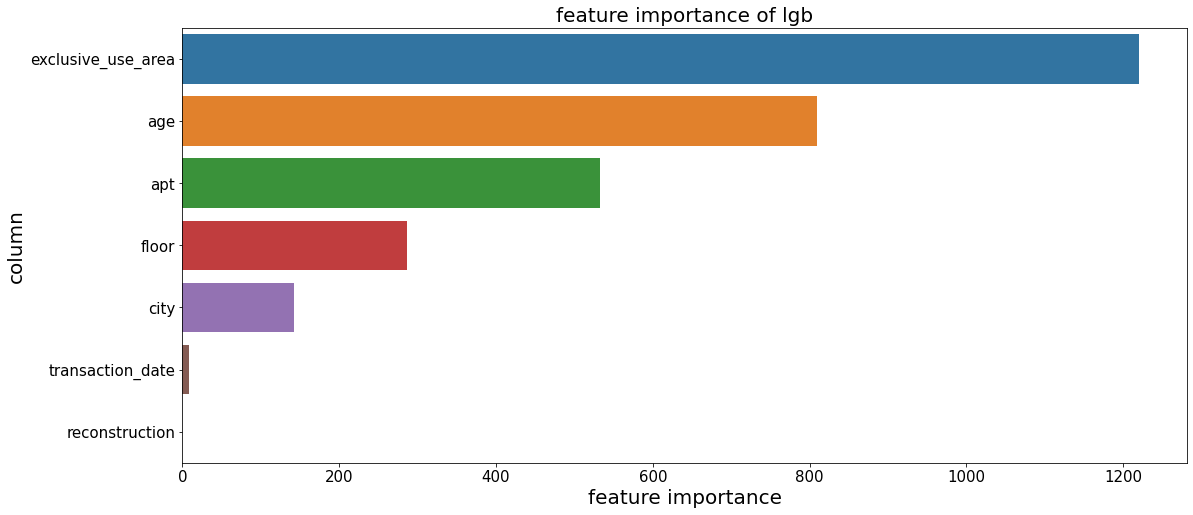

In [54]:
# seabornÏùò barplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î≥ÄÏàòÏùò Ï§ëÏöîÎèÑ ÏàúÏÑúÎåÄÎ°ú ÎÇòÌÉÄÎÇ¥Î¥ÖÏãúÎã§.

plt.figure(figsize = (18,8))
sns.barplot(x ='feature importance', y =lgb_feature_importance.index ,orient='h', data = lgb_feature_importance)
plt.title('feature importance of lgb', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('feature importance', size = 20)
plt.ylabel('column', size = 20)
plt.show()

---

# 4. Î™®Îç∏ ÏÑ†ÌÉù

ÏßÄÍ∏àÍπåÏßÄ 4Í∞ÄÏßÄ Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥Ïùò Î™®Îç∏Ïóê ÎåÄÌï¥ Î∞∞Ïõ†ÏäµÎãàÎã§! Î™®Îëê Í≥†ÏÉùÌïòÏÖ®Ïñ¥ÏöîüòÇüòÇ 


Í∑∏Î†áÎã§Î©¥ Ïù¥Í≤ÉÎì§ Ï§ë Ïö∞Î¶¨Îäî Ïñ¥Îñ§ Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï¥ÏïºÌï†ÍπåÏöî? 

Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï† ÎïåÎäî, Î™®Îç∏Ïùò <font color=blue>**ÏÑ±Îä•**</font>Í≥º <font color=blue>**ÏãúÍ∞Ñ**</font>ÏùÑ Î™®Îëê Í≥†Î†§ÌïòÎäî Í≤å Ï¢ãÏäµÎãàÎã§! 

Í∑∏Îü¨Î©¥ Ïö∞ÏÑ† Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥ Î™®Îç∏Îì§Ïùò ÏÑ±Îä• ÎπÑÍµêÎ•º Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

ÎπÑÍµêÎ•º ÏúÑÌï¥ ÏùºÎ∂Ä ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Îäî ÌÜµÏùº(n_estimators = 100)ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄÎäî Î™®Îëê default Í∞íÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

|Î™®Îç∏|RMSE|ÏãúÍ∞Ñ|
|------|---|---|
|Adaboost|0.3822|56Ï¥à|
|GBM|0.345|86Ï¥à|
|XGB|0.3445|57Ï¥à|
|lightGBM|0.3235|6.4Ï¥à|

Í≤∞Í≥ºÎ•º Î≥¥Îãà, <font color=green>**Light GBM**</font>Ïùò ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏúºÎ©¥ÏÑú ÏàòÌñâÏãúÍ∞ÑÎèÑ Îπ†Î•¥Í≥†, Î∞òÎ©¥ AdaboostÎäî ÏÑ±Îä•Ïù¥ Ïç© Ï¢ãÏßÄ ÏïäÎÑ§Ïöî! 

ÎòêÌïú GBMÍ≥º XGBoostÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏÜçÎèÑÍ∞Ä ÎäêÎ¶∞ Ìé∏Ïóê ÏÜçÌïòÎÑ§Ïöî üò• 

Ïù¥Ï≤òÎüº Î™®Îç∏Ïùò ÏÑ±Îä•Í≥º ÏÜçÎèÑÎ•º Î≥¥Í≥†, Ïñ¥Îñ§ Î™®Îç∏Ïù¥ Ïö∞ÏàòÌïúÏßÄ ÌåêÎã®Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Stage 5ÏóêÏÑúÎäî Ïó¨Îü¨ Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥Ïùò Î™®Îç∏Ïóê ÎåÄÌï¥ Î∞∞ÏõåÎ¥§ÎäîÎç∞Ïöî.

Í∑∏Îü¨Îãà Ïö∞Î¶¨Îäî Ïù¥Ï†ú Îã§ÏùåÍ≥º Í∞ôÏùÄ ÎåÄÌôîÎ•º ÎÇòÎàå Ïàò ÏûàÍ≤å Îêú Í±∞ÏóêÏöî!

üë©(ÎàÑÍµ∞Í∞Ä): `ÎÑà, Î∂ÄÏä§ÌåÖ Î™®Îç∏Ïù¥ Î≠îÏßÄ ÏïÑÎãà?` <br>
üë¶(Îç∞Ïù¥Ïª§ Ïó¨Îü¨Î∂Ñ): `ÎÇò, ÏµúÍ∑ºÏóê Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥ Î™®Îç∏Ïóê ÎåÄÌï¥ Ïó¥Ïã¨Ìûà Î∞∞Ïõ†Í∏∞ ÎïåÎ¨∏Ïóê Ïûò ÏïåÍ≥† ÏûàÏñ¥!`

Í∑∏Îü∞Îç∞, stage 5Í∞Ä Î≤åÏç® ÎÅùÏù¥ÎÉêÍµ¨Ïöî?  

üë®‚Äçüè´(ÌïúÎÇ®ÎçîÌûê ÌåÄÏõêÎì§): `ÏóêÏù¥, ÏÑ§ÎßàÏöî! Í∑∏Î†áÏßÄ ÏïäÏäµÎãàÎã§!!!!`



ÏßÄÍ∏àÍπåÏßÄ Ïó¥Ïã¨Ìûà Í≥µÎ∂ÄÌïòÏã† Ïó¨Îü¨Î∂ÑÎì§ÏùÑ ÏúÑÌï¥ Î≥¥ÎÑàÏä§ Ïã¨Ìôî Í≥ºÏ†ïÏùÑ Ï§ÄÎπÑÌñàÏäµÎãàÎã§! ÏÜåÎ¶¨ÏßàÎü¨! üì¢üì¢üì¢<br>



Ïù¥Î≤à Stage 5ÏóêÏÑúÎäî Ïã¨Ìôî Í≥ºÏ†ïÏùÑ Î¨¥Î†§ 2Í∞úÎÇò Ï§ÄÎπÑÌñàÎäîÎç∞Ïöî! Îã§Îì§ Îçî Î∞∞ÏõåÎ≥º Ï§ÄÎπÑ ÎêòÏÖ®ÎÇòÏöî? üí™üí™


---

# Ïã¨Ìôî1 CatBoost

Ï≤´ Î≤àÏß∏Îäî Î∞îÎ°ú Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥ Î™®Îç∏Ïùò Ïù∏Í∏∞ÏüÅÏù¥ <font color=red>Catboost</font>ÏûÖÎãàÎã§!

Îã§Îì§ Í∂ÅÍ∏àÌïòÏãúÏ£†? ÏûêÏÑ∏Ìûà~ Ï§ÄÎπÑÌñàÏúºÎãà Ï†ÄÌù¨Îßå ÎØøÍ≥† Îî∞ÎùºÏò§ÏÑ∏Ïöî!

Ïó¨Îü¨Î∂Ñ ÌòπÏãú CatBoost Ïù¥Î¶ÑÏùò Í∏∞ÏõêÏùÑ ÏïÑÏãúÎÇòÏöî?üò∂  




CatÎùºÎäî Ïù¥Î¶ÑÏùÄ <font color=green>Category</font>ÏóêÏÑú ÏôîÏäµÎãàÎã§. Ï¶â, CatBoostÎäî <font color=green>**Î≤îÏ£ºÌòï Î≥ÄÏàò**</font>Í∞Ä ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï†ÅÌï©ÌïòÎèÑÎ°ù Î∞úÏ†ÑÎêú Î∂ÄÏä§ÌåÖ Î™®Îç∏ÏûÖÎãàÎã§.



CatBoostÏùò ÌäπÏßïÏùÄ ÌÅ¨Í≤å Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

1. **<font color=orange>Ordered Boosting</font>**
2. **<font color=orange>Ordered Target Encoding</font>**
3. **<font color=orange>Categorical Feauture Combinations</font>**


Î®ºÏ†Ä Ordered Boosting Î∞©Î≤ïÎ∂ÄÌÑ∞ Î¥ÖÏãúÎã§ !





GBM Í∏∞Î∞òÏùò Í∏∞Ï°¥ Î™®Îç∏Îì§ÏùÄ ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïùò <font color=green>Ï†ÑÏ≤¥ ÏûîÏ∞®</font>Î•º Í≥ÑÏÇ∞Ìïú ÌõÑ ÏïΩÌïú ÌïôÏäµÍ∏∞Îì§Ïù¥ Ïù¥Î•º Í∞úÏÑ†ÏãúÌÇ§Îäî Î∞©Ìñ•ÏúºÎ°ú ÌïôÏäµÏù¥ ÏßÑÌñâÎêòÏóàÏäµÎãàÎã§.<br> 



Î∞òÎ©¥, CatboostÎäî ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïùò <font color=red>ÏùºÎ∂ÄÎßåÏúºÎ°ú ÏûîÏ∞® Í≥ÑÏÇ∞</font>ÏùÑ ÌïòÍ≥†, Îòê ÏÉàÎ°úÏö¥ Î∂ÄÏä§ÌåÖ Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ Îã§Ïãú ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§.<br> 



Îç∞Ïù¥ÌÑ∞Ïùò ÏùºÎ∂ÄÎ•º ÏÑ†ÌÉùÌïòÎäî Î∞©ÏãùÏùÄ **ÎûúÎç§**ÌïòÍ≤å ÏÑ†ÌÉùÎêòÎ©∞, Ïù¥Î•º ÌÜµÌï¥ÏÑú **Í≥ºÏ†ÅÌï©**ÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§.<br> 

 Ïù¥Îü¨Ìïú Î∞©ÏãùÏùò ÌïôÏäµ Î∞©Î≤ïÏùÑ **<font color=orange>Ordered Boosting</font>** Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§.

CatboostÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©ÏãùÏóêÏÑúÎèÑ Í∏∞Ï°¥ Î™®Îç∏Îì§Í≥ºÎäî Îã§Î•¥Í≤å <font color=orange>Ordered Target Encoding</font>ÎùºÎäî ÎèÖÌäπÌïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. 

Ìï¥Îãπ Î∞©Î≤ïÏùò ÌïµÏã¨ÏùÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ïù∏ÏΩîÎî©Ìï† Îïå yÍ∞í, Ï¶â <font color=blue>**Ï¢ÖÏÜçÎ≥ÄÏàò**</font>Î•º Ï∞∏Í≥†ÌïúÎã§Îäî Í≤ÉÏù∏Îç∞Ïöî.

ÏòàÏãúÎ•º ÌïúÎ≤à Î≥¥ÏûêÍµ¨Ïöî.

|ÏãúÍ∞Ñ|ÎÇ†Ïî®|Ïò®ÎèÑ(target)|
|------|---|---|
|1Ïùº|ÎßëÏùå|35|
2Ïùº|ÎßëÏùå|37|
|3Ïùº|ÌùêÎ¶º|20|
|4Ïùº|ÎßëÏùå|38|
|5Ïùº|ÌùêÎ¶º|18|
|6Ïùº|Î≤àÍ∞ú|10|
|7Ïùº|ÎπÑ|12|
|8Ïùº|ÎπÑ|13|
|9Ïùº|Î≤àÍ∞ú|8|
|10Ïùº|ÎπÑ|8|
|11Ïùº|ÎπÑ|10|

ÏòàÎ•º Îì§Ïñ¥ ÎÇ†Ïî® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÎÇ†Ïî®Îäî Ïö∞Î¶¨Í∞Ä Ïù∏ÏΩîÎî©Ìï¥Ïïº Ìï† Î≤îÏ£ºÌòï Î≥ÄÏàò, Ïò®ÎèÑÎäî Ïö∞Î¶¨Í∞Ä ÏïåÍ≥† Ïã∂ÏùÄ target Í∞íÏù¥ÎùºÍ≥† Í∞ÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§. 

Ïù¥Îïå Ïö∞Î¶¨Îäî ÎÇ†Ïî® Î≤îÏ£ºÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÍ∏∞ ÏúÑÌï¥ÏÑú targetÏù∏ Ïò®ÎèÑ Î≥ÄÏàòÏùò <font color=purple>ÌèâÍ∑†Í∞í</font>ÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.

ÎßëÏùå = $\frac{35+37+38}{3}$ = 36.67

ÌùêÎ¶º = $\frac{20+18}{2}$ = 19

Î≤àÍ∞ú = $\frac{10+8}{2}$ = 9

ÎπÑ = $\frac{12+13+8+10}{4}$ = 10.75


Ï¶â, ÎßëÏùå, ÌùêÎ¶º, Î≤àÍ∞ú, ÎπÑÏóê ÏÜçÌïòÎäî Îç∞Ïù¥ÌÑ∞Îì§ Í∞ÅÍ∞ÅÏùò target Í∞í ÌèâÍ∑†ÏùÑ Ïù∏ÏΩîÎî© Í∞íÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. 

Í∑∏ÎûòÏÑú <font color=blue>Mean Encoding</font>Ïù¥ÎùºÍ≥† Î∂àÎ¶¨Í∏∞ÎèÑ Ìï©ÎãàÎã§.

‚ö†Ô∏è ÌïòÏßÄÎßå Ïù¥Îïå Ï£ºÏùòÌï¥Ïïº Ìï† Ï†êÏù¥ ÏûàÏäµÎãàÎã§! ‚ö†Ô∏è



Ïö∞Î¶¨Í∞Ä ÏòàÏ∏°Ìï¥Ïïº Ìï† target Í∞íÏù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÌîºÏ≤òÏóê Îì§Ïñ¥Í∞ÄÎäî Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏∞Í≤å Îê©ÎãàÎã§. 

Ï†ïÎãµÏùÑ Í∞ÄÏßÄÍ≥† ÌïôÏäµÏùÑ Ìï¥Î≤ÑÎ¶¨Îäî Íº¥Ïù¥ ÎêòÎ≤ÑÎ¶¨Îäî Í±∞Ï£†üò´

 CatBoostÎäî Ïù¥Îü¨Ìïú Î¨∏Ï†úÏ†êÏùÑ Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ <font color=green>Ìï¥Îãπ Î≤îÏ£ºÏóê Ìï¥ÎãπÌïòÎäî Í≥ºÍ±∞Ïùò targetÍ∞íÎßå Î™®ÏïÑÏÑú ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï¥ Ïù∏ÏΩîÎî©</font>Ìï©ÎãàÎã§.

 ÏòàÎ•º Îì§Ïñ¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

8ÏùºÏóêÎäî, ÎπÑ = 12 Î°ú Ïù∏ÏΩîÎî©

10ÏùºÏóêÎäî, ÎπÑ = $\frac{12+13}{2}$ = 12.5 Î°ú Ïù∏ÏΩîÎî©

11ÏùºÏóêÎäî, ÎπÑ = $\frac{12+13+8}{3}$ = 11  Î°ú Ïù∏ÏΩîÎî©


Ï∞∏ ÎòëÎòëÌïòÏßÄ ÏïäÎÇòÏöî?üòÄ

ÌïòÏßÄÎßå, CatboostÍ∞Ä Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ìï≠ÏÉÅ Ordered Target EncodingÏùÑ ÌïòÎäî Í≤ÉÏùÄ ÏïÑÎãôÎãàÎã§. 

CatboostÎäî Î≤îÏ£ºÏùò Í∞úÏàòÍ∞Ä Ï†ÅÏùÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ÏÑúÎäî One-hot EncodingÏùÑ ÏàòÌñâÌï©ÎãàÎã§. <br>
Î≤îÏ£ºÏùò Í∞úÏàò Í∏∞Ï§ÄÏùÄ <font color=purple>one_hot_max_size</font> ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏÑ§Ï†ïÌïòÍ≤å Îê©ÎãàÎã§.

ÏòàÎ•º Îì§Ïñ¥ one_hot_max_size = 3 ÏúºÎ°ú Ï§Ä Í≤ΩÏö∞, <br>
Î≤îÏ£ºÏùò Í∞úÏàòÍ∞Ä 3Í∞ú Ïù¥ÌïòÏù∏ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÄ Target Encoding Ïù¥ ÏïÑÎãàÎùº One-hot EncodingÏùÑ ÌïòÍ≤å Îê©ÎãàÎã§.

Ï¶â catboostÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ï≤òÎ¶¨Ìï† Îïå  **Ordered Target Encoding**Í≥º **One-Hot Encoding**ÏùÑ ÌòºÏö©Ìï¥ÏÑú ÏÇ¨Ïö©Ìï©ÎãàÎã§.

ÎßàÏßÄÎßâÏúºÎ°ú catboostÎäî ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú information gainÏù¥ ÎπÑÏä∑Ìïú featureÎ•º ÏûêÎèôÏúºÎ°ú ÌïòÎÇòÏùò featureÎ°ú Ï°∞Ìï©Ìï©ÎãàÎã§.

 Ïù¥Î•º <font color=green>Categorical Feauture Combinations</font>Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§.

Ïù¥Î≤àÏóêÎèÑ ÏòàÏãúÎ•º Ï§ÄÎπÑÌñàÏäµÎãàÎã§ ü§©

|ÎÇòÎùº|Î®∏Î¶¨ÏÉâ|class label|
|------|---|---|
|Ïù∏ÎèÑ|Í≤ÄÏ†ï|1|
|Ïù∏ÎèÑ|Í≤ÄÏ†ï|1|
|Ïù∏ÎèÑ|Í≤ÄÏ†ï|1|
|Ïù∏ÎèÑ|Í≤ÄÏ†ï|1|
|ÎÖ∏Î•¥Ïõ®Ïù¥|ÎÖ∏Îûë|0|
|ÎÖ∏Î•¥Ïõ®Ïù¥|ÎÖ∏Îûë|0|
|ÎÖ∏Î•¥Ïõ®Ïù¥|ÎÖ∏Îûë|0|
|ÎÖ∏Î•¥Ïõ®Ïù¥|ÎÖ∏Îûë|0|


ÏúÑÏùò ÌÖåÏù¥Î∏îÏóêÏÑú class labelÏùÑ Íµ¨Î∂ÑÌïúÎã§Í≥† Ìï† Îïå, Ïó¨Îü¨Î∂ÑÏù¥ÎùºÎ©¥ Ïñ¥Îñ§ ÏπºÎüºÏùÑ ÏÇ¨Ïö©Ìï† Í≤É Í∞ôÎÇòÏöî? ÎÇòÎùº? ÏïÑÎãàÎ©¥ Î®∏Î¶¨ÏÉâ? ‚öñÔ∏è

ÏïÑÎãàÎ©¥ ÌòπÏãú, Ï†ú ÏßàÎ¨∏Ïù¥ Ï¢Ä Ïù¥ÏÉÅÌïòÍ≤å ÎäêÍª¥ÏßÄÏßÑ ÏïäÎÇòÏöî? üòé
 

ÏôúÎÉêÎ©¥ <font color=blue>Îëò Ï§ë ÏïÑÎ¨¥Í±∞ÎÇò ÏÇ¨Ïö©Ìï¥ÎèÑ ÎêòÍ∏∞ ÎïåÎ¨∏</font>ÏûÖÎãàÎã§.
 
 


Ïù¥Îäî ÎÇòÎùº Ïª¨Îüº, Î®∏Î¶¨ÏÉâ Ïª¨Îüº Î™®Îëê class labelÏùÑ Íµ¨Î∂ÑÌïòÎäîÎç∞ <font color=green>ÎèôÏùºÌïú Ï†ïÎ≥¥</font>Î•º Ï†úÍ≥µÌïòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. 



Ï¶â, Îëê ÏπºÎüºÏùò information gainÏùÄ <font color=green>ÎèôÏùº</font>Ìï¥Ïöî! 

Îî∞ÎùºÏÑú Ïù¥Îü¨Ìïú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨Ìï† Îïå CatboostÎäî <font color=blue>ÌïòÎÇòÏùò Î≥ÄÏàòÎ°ú ÌÜµÌï©</font>Ìï®ÏúºÎ°úÏç® Ïó∞ÏÇ∞ ÎπÑÏö©ÏùÑ Ï§ÑÏù¥Í≤å Îê©ÎãàÎã§. (Í≥†ÎÜà Ï∞∏ ÎòëÎòëÌïòÎÑ§! üòÆüòÆ)

Ïù¥Ï†ú Ïó¨Îü¨Î∂ÑÎì§Ïù¥ Í∏∞Îã§Î†∏Îçò CatBoost Ïã§Ïäµ ÏãúÍ∞ÑÏù¥ ÎêòÏóàÏäµÎãàÎã§!

CatBoost ÏóêÎäî `CatBoostClassifier`ÏôÄ `CatBoostRegressor`Ïù¥ ÏûàÏäµÎãàÎã§. 

Îã§Î•∏ Î™®Îç∏Îì§Í≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Î∂ÑÎ•òÏùò Í≤ΩÏö∞ `CatBoostClassifier`, ÌöåÍ∑ÄÏùò Í≤ΩÏö∞ `CatBoostRegressor`Î•º ÏÇ¨Ïö©ÌïòÍ≤å Îê©ÎãàÎã§. 

Ï†ÄÌù¨Îäî <font color=orange>**CatBoostRegressor**</font>Î•º Î∂àÎü¨ÏôÄÏÑú Ïã§ÏäµÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.



```
from catboost import CatBoostRegressor
```



CatBoostÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê ÌäπÌôîÎêú Î™®Îç∏Ïù¥ÎùºÍ≥† ÌñàÏ£†? 



ÎïåÎ¨∏Ïóê CatboostÏóêÎäî <font color=orange>**cat_features**</font>ÎùºÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏßÄÏ†ïÌïòÎäî ÏöîÏÜåÍ∞Ä ÏûàÏäµÎãàÎã§.

Ïó¨Í∏∞Ïóê Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏûÖÎ†•ÌïòÍ≤å Îê©ÎãàÎã§.

 ÎòêÌïú <font color=orange>**one_hot_max_size**</font>Î•º ÌÜµÌï¥ One-Hot EncodingÌï† Î≤îÏ£ºÏùò ÏµúÎåÄÏàòÎ•º ÏßÄÏ†ïÌïòÍ≤å Îê©ÎãàÎã§. 

Ïù¥ Îëê ÏöîÏÜåÎ•º ÌÜµÌï¥ CatboostÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ **Ordered Target Encoding**Í≥º **One-Hot Encoding**ÏùÑ ÏàòÌñâÌïòÍ≤å Îê©ÎãàÎã§.

Ïù¥Î•º ÏúÑÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Î®ºÏ†Ä ÏßÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§.

```
cat_f = ['city', 'transaction_date', 'reconstruction']
```



Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Î≤îÏ£ºÏùò ÏàòÍ∞Ä Í∞ÅÍ∞Å 2Í∞ú, 3Í∞ú, 2Í∞úÎ°ú Î≤îÏ£ºÏùò ÏàòÍ∞Ä ÎßéÏßÄ ÏïäÎÑ§Ïöî.

Í∑∏ÎûòÏÑú <font color=green>**one_hot_max_size = 3**</font>ÏùÑ ÏßÄÏ†ïÌïòÎ©¥ Î™®Îì† Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ one-hot encodingÏùÑ ÏàòÌñâÌïòÍ≤å Îê©ÎãàÎã§!

Ïù¥ÌõÑÏùò ÌïôÏäµ Í≥ºÏ†ïÏùÄ Îã§Î•∏ Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥Ïùò Î™®Îç∏Îì§Í≥º ÎèôÏùºÌï©ÎãàÎã§.



```
cbr =  CatBoostRegressor(n_estimators = 100,random_state = 42, cat_features = cat_f, one_hot_max_size = 3 , eval_metric = 'RMSE')
model_cbr =  cbr.fit(X_tr, y_tr, eval_set =[(X_tr, y_tr), (X_val, y_val)] ,early_stopping_rounds=50)
cbr_pred = model_cbr.predict(X_test)
print('cbr',RMSE(cbr_pred,y_test))
```



image.png

RMSEÍ∞Ä 0.3187Î°ú ÎÇÆÍ≤å ÎÇòÏôîÎÑ§Ïöî!

Ï≤´Î≤àÏß∏ Ïã¨Ìôî Í≥ºÏ†ï Ïûò Î∞∞Ïö∞ÏÖ®ÎÇòÏöî? Ïù¥Ï†ú catboostÍ∞Ä Ïôú Ïù∏Í∏∞ÏüÅÏù¥Ïù∏ÏßÄ ÏïÑÏãúÍ≤†ÏßÄÏöî?üòÜ

Ïà® Í∞ÄÏÅòÍ≤å Îã¨Î†§Ïò® Îç∞Ïù¥Ïª§ Ïó¨Îü¨Î∂ÑÎì§Íªò Î∞ïÏàòÎ•º Î≥¥ÎÉÖÎãàÎã§ üëèüëè

Ïù¥Ï†ú ÎßàÏßÄÎßâ Í≥ºÏ†ï ÌïòÎÇòÎßå ÎÇ®ÏïÑ ÏûàÏäµÎãàÎã§! ÎÑàÎ¨¥ ÏïÑÏâ¨Ïö∞ÏãúÎã§Íµ¨Ïöî?

ÌïòÌïò, Í∑∏ÎûòÏÑú Îëê Î≤àÏß∏ Ïã¨ÌôîÍ≥ºÏ†ïÎèÑ Ïó¥Ïã¨Ìûà Ï§ÄÎπÑÌñàÏúºÎãà ÎßàÏßÄÎßâÍπåÏßÄ Ìï®Íªò ÌïòÍ∏∞Î°ú ÏïΩÏÜç! ÏïΩÏÜç! ü§ôü§ô

---

# Ïã¨Ìôî2 Pycaret

Ï†ÄÌù¨Í∞Ä Ï§ÄÎπÑÌïú Ïã¨Ìôî Í≥ºÏ†ï Îëê Î≤àÏß∏Îäî Î™®Îç∏ ÏÑ†Ï†ïÏùò Í∏∏Ïû°Ïù¥ Ïó≠Ìï†ÏùÑ Ìï¥Ï£ºÎäî <font color=red>Pycaret</font>ÏûÖÎãàÎã§! 

Ïûê! Í∑∏Îüº ÏãúÏûëÌï©ÎãàÎã§~ üöó

Ïó¨Îü¨Î∂Ñ, Ïö∞Î¶¨Îäî stage 4, 5Ïóê Í±∏Ï≥êÏÑú Ïó¨Îü¨ Î™®Îç∏ÏùÑ ÏÇ¥Ìé¥Î¥§ÎäîÎç∞Ïöî. <br>
Í∑∏Îü∞Îç∞ Ïñ¥Îñ§ Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï† Í≤ÉÏù∏Í∞ÄÎ•º Í≤∞Ï†ïÌï† Îïå Îß§Î≤à Ïù¥Î†áÍ≤å Î™®Îç∏Îì§ÏùÑ ÌïòÎÇòÏî© Íµ¨ÌòÑÌïú ÌõÑ ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Ïïº Ìï†ÍπåÏöî?

Îçî Ìö®Ïú®Ï†ÅÏù∏ Î∞©Î≤ïÏùÄ ÏóÜÏùÑÍπåÏöî? ü§î

Ïù¥Îü∞ ÏÉÅÌô©ÏóêÏÑú, Î™®Îç∏ ÏÑ†ÌÉùÏùÑ Ìé∏Î¶¨ÌïòÍ≤å Ìï¥Ï£ºÎäî PycaretÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§!

<font color=red>**Pycaret**</font>Ïù¥ÎûÄ Î®∏Ïã†Îü¨Îãù ÏõåÌÅ¨ÌîåÎ°úÏö∞Î•º ÏûêÎèôÌôîÌïú Ïò§ÌîàÏÜåÏä§ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§. 

Ï¶â, Î∂ÑÎ•òÎÇò ÌöåÍ∑ÄÎ¨∏Ï†úÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî Ïó¨Îü¨ Î™®Îç∏Îì§ÏùÑ ÎèôÏùºÌïú ÌôòÍ≤ΩÏóêÏÑú ÏâΩÍ≤å Íµ¨ÌòÑÌïòÎèÑÎ°ù **ÏûêÎèôÌôîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨**ÏûÖÎãàÎã§.

(ÏôÄ~ ÏûêÎèôÏù¥ÎùºÎãà! ÎÑàÎ¨¥ Ìé∏Î¶¨ÌïúÍ±∞ ÏïÑÎãåÍ∞ÄÏöî?üòÜ)

PycaretÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏΩîÎìú Î™á Ï§ÑÎßåÏúºÎ°ú Ïó¨Îü¨ Î™®Îç∏ÏùÑ ÎπÑÍµêÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, Î™®Îç∏ ÏÑ†Ï†ï Í≥ºÏ†ïÏóêÏÑú Í∏∏Ïû°Ïù¥ Ïó≠Ìï†ÏùÑ Ìï¥Ï§çÎãàÎã§. 

Ïù¥Ï†ú PycaretÏùÑ ÌÜµÌï¥ Ïö∞Î¶¨Í∞Ä Î≥¥Ïú†Ìïú Îç∞Ïù¥ÌÑ∞ÏóêÎäî Ïñ¥Îñ§ Î™®Îç∏Ïù¥ Ï†ÅÌï©ÌïúÏßÄ ÏïåÏïÑÎ≥ºÍ≤åÏöî!

Í∑∏Î¶¨Í≥† Ïö∞Î¶¨Îäî ÌöåÍ∑ÄÎ¨∏Ï†úÎ•º ÌíÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê <font color=orange>from pycaret.regression import</font>Î•º ÌÜµÌï¥ regressionÍ≥º Í¥ÄÎ†®Îêú Í≤ÉÎì§ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§. 

Ïó¨Í∏∞ÏÑú **<font color=blue>*</font>**Îäî Í¥ÄÎ†®Îêú Î™®Îì† Í±∏ Î∂àÎü¨Ïò®Îã§Îäî ÎúªÏûÖÎãàÎã§.



```
from pycaret.regression import *
```



Ïù¥ÌõÑ <font color=orange>setup()</font>Ìï®ÏàòÎ•º ÌÜµÌï¥ Ï†ÑÏ≤¥Ï†ÅÏù∏ Î®∏Ïã†Îü¨Îãù ÌãÄÏùÑ ÏßúÍ≤å Îê©ÎãàÎã§. Ïó¨Í∏∞Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎåÄÌëúÏ†ÅÏù∏ Ïù∏ÏûêÎì§ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

* data : Î®∏Ïã†Îü¨ÎãùÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞
* target : Ïö∞Î¶¨Í∞Ä ÏòàÏ∏°ÌïòÍ≥†Ïûê ÌïòÎäî ÏπºÎüº(Ï¢ÖÏÜç Î≥ÄÏàò)
* categorical_features : Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§Ïùò Ïù¥Î¶Ñ 
* numeric_features : ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïùò Ïù¥Î¶Ñ
* train_size : train, test Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏú®
* normalize : ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïùò scaling Ïú†Î¨¥
* normalize_method  : scaling Î∞©Î≤ï
* session_id : ÎûúÎç§ÏãúÎìúÍ∞í Í≥†Ï†ï

‚ùó‚ùó Ïó¨Í∏∞ÏÑú Ï§ëÏöîÌïú Ï†ê ÌïòÎÇòÎ•º ÏßöÍ≥† ÎÑòÏñ¥Í∞ëÏãúÎã§  ‚ùó‚ùó 

data ÏöîÏÜåÏóê Îì§Ïñ¥Í∞ÄÎäî Îç∞Ïù¥ÌÑ∞Îäî <font color=blue>**y**</font> ÍπåÏßÄ Ìè¨Ìï®ÎêòÏñ¥Ïïº Ìï¥Ïöî. 

Í∑∏ÎûòÏÑú Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† <font color=blue>**XÏôÄ y**</font>Î•º Ìï©Ï≥êÏÑú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ïïº Ìï©ÎãàÎã§!



```
full_train = pd.concat([X, y], axis=1)
```



Îã§ÏùåÏúºÎ°ú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§Ïùò Ïù¥Î¶Ñ, ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïùò Ïù¥Î¶ÑÏùÑ Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú ÎßåÎì§Í≤†ÏäµÎãàÎã§.



```
categorical_features = ['city','transaction_date', 'reconstruction']
numeric_features = ['exclusive_use_area','floor', 'age', 'apt']
```



Ïù¥Ï†ú train Îç∞Ïù¥ÌÑ∞ÏôÄ test Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏú®ÏùÑ 8ÎåÄ 2ÏúºÎ°ú ÌïòÏó¨ Î®∏Ïã†Îü¨Îãù ÌãÄÏùÑ ÏßúÎ≥ºÍ≤åÏöî!



```
from pycaret.regression import *

reg = setup(data = full_train, 
            target = 'transaction_real_price', 
            categorical_features = categorical_features,
            numeric_features = numeric_features,
            train_size = 0.8, 
            normalize = True,
            normalize_method = 'minmax',
            session_id = 42)
```



Îã§ÏùåÏúºÎ°ú  <font color=orange>compare_models</font>Îì§ÏùÑ ÌÜµÌï¥ Ïó¨Îü¨ Î™®Îç∏Îì§ÏùÑ Íµ¨Ï∂ïÌïú ÌõÑ ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï† Ïàò ÏûàÏäµÎãàÎã§.

Ïó¨Í∏∞ÏÑú ÏÇ¨Ïö©ÎêòÎäî ÎåÄÌëúÏ†ÅÏù∏ Ïù∏ÏûêÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

* fold : cross validationÏùÑ ÏàòÌñâÌï† ÎïåÏùò Ìè¥Îìú Ïàò
* n_select : Ï∂úÎ†•Ìï† Î™®Îç∏Ïùò Ïàò
* sort : Î™®Îç∏Îì§ÏùÑ ÎÇòÏó¥Ìï† Îïå Í∏∞Ï§ÄÏù¥ ÎêòÎäî ÏÑ±Îä• ÌèâÍ∞Ä Ï≤ôÎèÑ
* include : ÎÇ¥Í∞Ä ÎπÑÍµêÌïòÍ≥† Ïã∂ÏùÄ Î™®Îç∏Îì§ (ÎßåÏïΩ includeÎ•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏúºÎ©¥, ÎÇ¥Ïû•ÎêòÏñ¥ ÏûàÎäî Î™®Îì† Î™®Îç∏Îì§ÏùÑ ÎπÑÍµêÌï¥Ïöî üòÉ)

Ïö∞Î¶¨Í∞Ä Í∑∏ÎèôÏïà Í≥µÎ∂ÄÌñàÎçò Î™®Îç∏Îì§ÏùÑ includeÏóê ÎÑ£Í≥† ÏÑ±Îä• ÎπÑÍµêÎ•º Ìï¥Î¥ÖÏãúÎã§ üß°



```
models = compare_models(fold = 5, sort = 'RMSE', n_select = 6, include = ['rf', 'lr', 'ada', 'gbr', 'xgboost','lightgbm'])
```



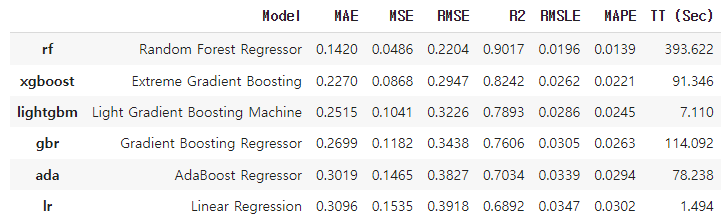

RMSEÎ•º Í∏∞Ï§ÄÏúºÎ°ú <font color=purple>**RandomForest**</font>Í∞Ä Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÍ≥† XGBoost, LightGBM ÏàúÏúºÎ°ú ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌïòÍ≤å ÎÇòÏôîÎÑ§Ïöî!

Ïñ¥! Í∑∏Îü∞Îç∞ Ï°∞Í∏à Ïù¥ÏÉÅÌïòÎÑ§Ïöî üòì <br>
ÏïûÏóêÏÑú ÌïòÎÇòÏî© Ï∂úÎ†•ÌñàÏùÑ ÎïåÏùò Í≤∞Í≥ºÎ•º Í∏∞ÏñµÌïòÏãúÎÇòÏöî? Ïôú PycaretÏóêÏÑúÎäî Îã§Î•∏ Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÏùÑÍπåÏöî?

PycaretÏùÄ <font color=green>**cross-validation**</font>ÏùÑ ÌÜµÌï¥ <font color=green>ÌèâÍ∑†Ï†ÅÏù∏ ÏÑ±Îä•</font>ÏùÑ Ï∏°Ï†ïÌñàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. (ÏïÑ~ Í∑∏Î†áÍµ¨ÎÇò!üòÄ)

Í∑∏Îü∞Îç∞ Ïû†ÍπêÎßåÏöî ‚úã‚úã

‚ö†Ô∏è‚ö†Ô∏è Ïò§Ìï¥ÌïòÍ∏∞ ÏóÜÍ∏∞! ‚ö†Ô∏è‚ö†Ô∏è 



Í∑∏Î†áÎã§Í≥† Ìï¥ÏÑú, ÏúÑÏóê ÎÇòÏò® Í≤∞Í≥ºÍ∞Ä <font color=green>**Ï†àÎåÄÏ†ÅÏù∏ Í≤∞Í≥ºÎäî ÏïÑÎãàÎûçÎãàÎã§.</font>** 

Î™®Îç∏Îì§ÏùÄ <font color=green>ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞</font>Ïóê Îî∞Îùº ÏÑ±Îä•Ïù¥ ÌÅ¨Í≤å Îã¨ÎùºÏßÄÍ∏∞ ÎïåÎ¨∏Ïù¥ÏóêÏöî!

Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê PycaretÏùÑ ÌÜµÌï¥ Î™®Îç∏ÏùÑ ÎπÑÍµêÌï† ÎïåÏóêÎäî ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº, <br>
Ïó¨Îü¨ Î™®Îç∏Îì§ Ï§ë <font color=blue>**ÏµúÏ¢Ö Î™®Îç∏Ïùò ÌõÑÎ≥¥ÏóêÏÑú ÌÉàÎùΩÏãúÌÇ§Îäî Ïùº**</font>ÏùÑ Ìï¥Ïïº Ìï©ÎãàÎã§.

ÏúÑÏóêÏÑú ÎÇòÏôîÎçò Í≤∞Í≥ºÏôÄ Pycaret Î™®Îëê AdaBoostÍ∞Ä Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥Ïùò Î™®Îç∏Îì§ Ï§ë Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ïïà Ï¢ãÍ∏∞ ÎïåÎ¨∏Ïóê <font color=purple>**AdaBoostÎäî Î™®Îç∏ ÌõÑÎ≥¥ÏóêÏÑú Ï†úÏô∏**</font>Ìï©ÎãàÎã§!

ÎòêÌïú Í∑∏Î≥¥Îã§ ÏÑ±Îä•Ïù¥ Îçî Ïïà Ï¢ãÏùÄ <font color=purple>**Linear Regression Î™®Îç∏ÎèÑ ÏµúÏ¢Ö ÌõÑÎ≥¥ÏóêÏÑú Ï†úÏô∏**</font>ÌïòÍ≤†ÏäµÎãàÎã§!‚úÇÔ∏è‚úÇÔ∏è 

Îã§ÏùåÏúºÎ°ú Gradient Boosting RegressorÏùÄ ÏÜçÎèÑÎèÑ ÎäêÎ¶¨Î©¥ÏÑú ÏÑ±Îä•ÎèÑ Ï¢ãÏßÄ ÏïäÏäµÎãàÎã§. <br>
Îî∞ÎùºÏÑú **Gradient Boosting Regressor ÎòêÌïú ÏµúÏ¢Ö ÌõÑÎ≥¥ÏóêÏÑú Ï†úÏô∏**ÌïòÍ≤†ÏäµÎãàÎã§.‚úÇÔ∏è‚úÇÔ∏è  

Ïù¥Ï†ú ÏïûÏóêÏÑú ÏßÑÌñâÌñàÎçò Í≥ºÏ†ïÍ≥º Pycaret Í≤∞Í≥ºÎ•º Ï¢ÖÌï©ÌïòÏó¨ **<font color=red>RandomForest</font>**, **<font color=red>XGBoost</font>**, <font color=red>**Light GBM**</font>ÏùÑ ÏµúÏ¢Ö ÌõÑÎ≥¥Î°ú ÏÑ†Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.

---

# 4. Í≤∞Î°†

ÏïûÏóêÏÑú Ïñ∏Í∏âÌïú Í≤ÉÏ≤òÎüº Î™®Îç∏ÏùÄ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Í∞íÏóê Îî∞Îùº ÏÑ±Îä•Ïù¥ ÌÅ¨Í≤å Îã¨ÎùºÏßëÎãàÎã§. 

Í∑∏ÎûòÏÑú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Í≥ºÏ†ïÏù¥ ÌïÑÏöîÌïú Í≤ÉÏù∏Îç∞Ïöî. 

Ïö∞Î¶¨Îäî Stage 6ÏóêÏÑú ÏµúÏ¢Ö ÌõÑÎ≥¥Îì§Ïùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ ÏÑ†Ï†ïÌï¥Î≥¥Í≤†ÏäµÎãàÎã§!



Í∑∏Îüº Î™®Îëê Stage 6ÏóêÏÑú ÎßåÎÇòÏöî~üòâ

---